In [108]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 50)

## Examining different reward functions
1. Average change in area across plants
2. Median change in area across plants

### Data Processing

In [110]:
path = os.path.dirname(os.path.abspath("")) + '/analysis/data/plant_area_data.csv'
df = pd.read_csv(path).sort_values(by='timestamp')
df.columns = df.columns.str.replace(' ', '_')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.head(300)

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  plant_3_(4-12-7)  \
0   2024-02-10 09:00:00             559.0             439.0             335.0   
1   2024-02-10 09:10:00             548.0             390.0             338.0   
2   2024-02-10 09:20:00             560.0             426.0             328.0   
3   2024-02-10 09:30:00             549.0             438.0             342.0   
4   2024-02-10 09:40:00             561.0             444.0             353.0   
..                  ...               ...               ...               ...   
295 2024-02-14 10:10:00            1514.0            1268.0             904.0   
296 2024-02-14 10:20:00            1507.0            1302.0             897.0   
297 2024-02-14 10:30:00            1510.0            1315.0             919.0   
298 2024-02-14 10:40:00            1473.0            1321.0             906.0   
299 2024-02-14 10:50:00            1523.0            1290.0             895.0   

     plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  plant_7_(4-12-7)  \
0               370.0             302.0             353.0             373.0   
1               363.0             302.0             277.0             336.0   
2               371.0             303.0             275.0             365.0   
3               367.0             296.0             266.0             370.0   
4               376.0             308.0             272.0             372.0   
..                ...               ...               ...               ...   
295            1128.0             973.0            1039.0            1062.0   
296            1115.0             968.0             991.0            1081.0   
297            1135.0            1001.0            1037.0            1065.0   
298            1144.0             947.0             995.0            1077.0   
299            1107.0             989.0            1014.0            1034.0   

     plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  plant_11_(10-6)  \
0               267.0           289.0            417.0            355.0   
1               224.0           275.0            410.0            362.0   
2               240.0           284.0            417.0            356.0   
3               248.0           284.0            420.0            356.0   
4               257.0           281.0            423.0            361.0   
..                ...             ...              ...              ...   
295             938.0           742.0           1033.0            970.0   
296             970.0           741.0           1034.0            958.0   
297             945.0           733.0           1022.0            962.0   
298             980.0           730.0           1027.0            929.0   
299             988.0           743.0           1025.0            955.0   

     plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  plant_15_(10-6)  \
0              457.0            300.0            397.0            444.0   
1              465.0            311.0            408.0            431.0   
2              461.0            319.0            405.0            440.0   
3              464.0            310.0            404.0            434.0   
4              466.0            316.0            414.0            445.0   
..               ...              ...              ...              ...   
295           1330.0            902.0           1192.0           1023.0   
296           1310.0            906.0           1178.0           1022.0   
297           1313.0            918.0           1188.0           1027.0   
298           1324.0            899.0           1182.0           1010.0   
299           1315.0            891.0           1179.0           1017.0   

     plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  plant_19_(12-2)  \
0              455.0            287.0            480.0            404.0   
1              463.0            285.0            487.0            412.0   
2              463.0            292.0            482.0           

In [111]:
# Get normalized area by subtracting each plants starting area from all area observations
plant_cols = df.columns.difference(['timestamp'])
df_norm = df.copy()
df_norm.loc[:, plant_cols] = df_norm.loc[:, plant_cols].subtract(df_norm.loc[0, plant_cols]).to_numpy(dtype=float)
df_norm['median_area'] = df_norm.loc[:, plant_cols].median(axis=1)
df_norm['mean_area'] = df_norm.loc[:, plant_cols].mean(axis=1)
df_norm

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
0    2024-02-10 09:00:00               0.0               0.0   
1    2024-02-10 09:10:00             -11.0             -49.0   
2    2024-02-10 09:20:00               1.0             -13.0   
3    2024-02-10 09:30:00             -10.0              -1.0   
4    2024-02-10 09:40:00               2.0               5.0   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00           11127.0           12364.0   
1148 2024-02-25 20:20:00           11134.0           12391.0   
1149 2024-02-25 20:30:00           11161.0           12370.0   
1150 2024-02-25 20:40:00           11150.0           12455.0   
1151 2024-02-25 20:50:00           11161.0           12471.0   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
0                  0.0               0.0               0.0               0.0   
1                  3.0              -7.0               0.0             -76.0   
2                 -7.0               1.0               1.0             -78.0   
3                  7.0              -3.0              -6.0             -87.0   
4                 18.0               6.0               6.0             -81.0   
...                ...               ...               ...               ...   
1147            7294.0            8508.0            8653.0            8814.0   
1148            7297.0            8488.0            8653.0            8924.0   
1149            7333.0            8546.0            8787.0            9085.0   
1150            7279.0            8565.0            8664.0            8927.0   
1151            7285.0            8533.0            8778.0            9061.0   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
0                  0.0               0.0             0.0              0.0   
1                -37.0             -43.0           -14.0             -7.0   
2                 -8.0             -27.0            -5.0              0.0   
3                 -3.0             -19.0            -5.0              3.0   
4                 -1.0             -10.0            -8.0              6.0   
...                ...               ...             ...              ...   
1147            8848.0            8638.0          6524.0           8713.0   
1148            8179.0            7348.0          6568.0           8775.0   
1149            8654.0            8521.0          6570.0           8775.0   
1150            8244.0            8230.0          6600.0           8803.0   
1151            8081.0            7058.0          6593.0           8821.0   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
0                 0.0              0.0              0.0              0.0   
1                 7.0              8.0             11.0             11.0   
2                 1.0              4.0             19.0              8.0   
3                 1.0              7.0             10.0              7.0   
4                 6.0              9.0             16.0             17.0   
...               ...              ...              ...              ...   
1147           7807.0          10193.0           6677.0           9516.0   
1148           7832.0          10213.0           6664.0           9524.0   
1149           7843.0          10200.0           6690.0           9546.0   
1150           7887.0          10217.0           6692.0           9591.0   
1151           7933.0          10236.0           6703.0           9600.0   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
0                 0.0              0.0              0.0              0.0   
1               -13.0              8.0             -2.0              7.0   
2                -4.0              8.0              5.0              2.0   
3               -10.0             15.0              8.0              7.0   
4                 1.0             24.0              7.0            

In [112]:
# Get change in area at each timestep 
# Note change in un-normalized and normalized area is the same since normalized just has a constant subtracted
delta_df = df.copy()
delta_df.loc[:, plant_cols] = delta_df.loc[:, plant_cols].diff()
delta_df = delta_df.iloc[1:]
# Get median and mean change across all plants for each row
delta_df['median_change'] = delta_df.loc[:, plant_cols].median(axis=1)
delta_df['mean_change'] = delta_df.loc[:, plant_cols].mean(axis=1)
delta_df

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
1    2024-02-10 09:10:00             -11.0             -49.0   
2    2024-02-10 09:20:00              12.0              36.0   
3    2024-02-10 09:30:00             -11.0              12.0   
4    2024-02-10 09:40:00              12.0               6.0   
5    2024-02-10 09:50:00              -3.0             -11.0   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00              12.0              42.0   
1148 2024-02-25 20:20:00               7.0              27.0   
1149 2024-02-25 20:30:00              27.0             -21.0   
1150 2024-02-25 20:40:00             -11.0              85.0   
1151 2024-02-25 20:50:00              11.0              16.0   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
1                  3.0              -7.0               0.0             -76.0   
2                -10.0               8.0               1.0              -2.0   
3                 14.0              -4.0              -7.0              -9.0   
4                 11.0               9.0              12.0               6.0   
5                -10.0               3.0               2.0              14.0   
...                ...               ...               ...               ...   
1147              51.0               7.0             -49.0             -61.0   
1148               3.0             -20.0               0.0             110.0   
1149              36.0              58.0             134.0             161.0   
1150             -54.0              19.0            -123.0            -158.0   
1151               6.0             -32.0             114.0             134.0   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
1                -37.0             -43.0           -14.0             -7.0   
2                 29.0              16.0             9.0              7.0   
3                  5.0               8.0             0.0              3.0   
4                  2.0               9.0            -3.0              3.0   
5                -12.0              -3.0            -3.0              0.0   
...                ...               ...             ...              ...   
1147             789.0            1314.0            13.0            -28.0   
1148            -669.0           -1290.0            44.0             62.0   
1149             475.0            1173.0             2.0              0.0   
1150            -410.0            -291.0            30.0             28.0   
1151            -163.0           -1172.0            -7.0             18.0   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
1                 7.0              8.0             11.0             11.0   
2                -6.0             -4.0              8.0             -3.0   
3                 0.0              3.0             -9.0             -1.0   
4                 5.0              2.0              6.0             10.0   
5                 4.0              8.0             -6.0              0.0   
...               ...              ...              ...              ...   
1147            -52.0            -23.0             11.0              3.0   
1148             25.0             20.0            -13.0              8.0   
1149             11.0            -13.0             26.0             22.0   
1150             44.0             17.0              2.0             45.0   
1151             46.0             19.0             11.0              9.0   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
1               -13.0              8.0             -2.0              7.0   
2                 9.0              0.0              7.0             -5.0   
3                -6.0              7.0              3.0              5.0   
4                11.0              9.0             -1.0              5.0   
5                -8.0             -3.0              8.0            

In [113]:
# Get moving window average of past 10 entries for normalized area for all plants
window_size = 10
for col in plant_cols:
    df_norm[f'{col}_window_avg'] = df_norm[col].rolling(window=window_size, min_periods=1, center=True).mean()
df_norm

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
0    2024-02-10 09:00:00               0.0               0.0   
1    2024-02-10 09:10:00             -11.0             -49.0   
2    2024-02-10 09:20:00               1.0             -13.0   
3    2024-02-10 09:30:00             -10.0              -1.0   
4    2024-02-10 09:40:00               2.0               5.0   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00           11127.0           12364.0   
1148 2024-02-25 20:20:00           11134.0           12391.0   
1149 2024-02-25 20:30:00           11161.0           12370.0   
1150 2024-02-25 20:40:00           11150.0           12455.0   
1151 2024-02-25 20:50:00           11161.0           12471.0   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
0                  0.0               0.0               0.0               0.0   
1                  3.0              -7.0               0.0             -76.0   
2                 -7.0               1.0               1.0             -78.0   
3                  7.0              -3.0              -6.0             -87.0   
4                 18.0               6.0               6.0             -81.0   
...                ...               ...               ...               ...   
1147            7294.0            8508.0            8653.0            8814.0   
1148            7297.0            8488.0            8653.0            8924.0   
1149            7333.0            8546.0            8787.0            9085.0   
1150            7279.0            8565.0            8664.0            8927.0   
1151            7285.0            8533.0            8778.0            9061.0   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
0                  0.0               0.0             0.0              0.0   
1                -37.0             -43.0           -14.0             -7.0   
2                 -8.0             -27.0            -5.0              0.0   
3                 -3.0             -19.0            -5.0              3.0   
4                 -1.0             -10.0            -8.0              6.0   
...                ...               ...             ...              ...   
1147            8848.0            8638.0          6524.0           8713.0   
1148            8179.0            7348.0          6568.0           8775.0   
1149            8654.0            8521.0          6570.0           8775.0   
1150            8244.0            8230.0          6600.0           8803.0   
1151            8081.0            7058.0          6593.0           8821.0   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
0                 0.0              0.0              0.0              0.0   
1                 7.0              8.0             11.0             11.0   
2                 1.0              4.0             19.0              8.0   
3                 1.0              7.0             10.0              7.0   
4                 6.0              9.0             16.0             17.0   
...               ...              ...              ...              ...   
1147           7807.0          10193.0           6677.0           9516.0   
1148           7832.0          10213.0           6664.0           9524.0   
1149           7843.0          10200.0           6690.0           9546.0   
1150           7887.0          10217.0           6692.0           9591.0   
1151           7933.0          10236.0           6703.0           9600.0   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
0                 0.0              0.0              0.0              0.0   
1               -13.0              8.0             -2.0              7.0   
2                -4.0              8.0              5.0              2.0   
3               -10.0             15.0              8.0              7.0   
4                 1.0             24.0              7.0            

In [114]:
# Get areas and window avergaes of area from 1 day prior and compute differences between current area and these values. 
# Note that we drop the first day since it does not have a previous day. 
lagged_plant_cols = {
    f'{col}_lagged': df_norm[col].shift(periods=72)
    for col in plant_cols
}
lagged_window_avg = {
    f'{col}_window_avg_lagged': df_norm[f'{col}_window_avg'].shift(periods=72)
    for col in plant_cols
}
lagged_delta = {
    f'{col}_lagged_delta': df_norm[col] - lagged_plant_cols[f'{col}_lagged'] 
    for col in plant_cols
}
window_avg_lagged_delta = {
    f'{col}_window_avg_lagged_delta': df_norm[col] - lagged_window_avg[f'{col}_window_avg_lagged'] 
    for col in plant_cols
}

df_norm_lag = pd.concat(
    [
        df_norm, 
        pd.DataFrame(lagged_plant_cols), 
        pd.DataFrame(lagged_window_avg),
        pd.DataFrame(lagged_delta),
        pd.DataFrame(window_avg_lagged_delta)
    ], 
    axis=1
).iloc[72:]

df_norm_lag

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
72   2024-02-11 09:00:00             147.0             158.0   
73   2024-02-11 09:10:00             136.0             146.0   
74   2024-02-11 09:20:00             140.0             153.0   
75   2024-02-11 09:30:00             123.0             151.0   
76   2024-02-11 09:40:00             156.0             153.0   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00           11127.0           12364.0   
1148 2024-02-25 20:20:00           11134.0           12391.0   
1149 2024-02-25 20:30:00           11161.0           12370.0   
1150 2024-02-25 20:40:00           11150.0           12455.0   
1151 2024-02-25 20:50:00           11161.0           12471.0   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
72               148.0             115.0              97.0              35.0   
73               137.0             111.0             110.0              21.0   
74               147.0             114.0             111.0              42.0   
75               130.0             118.0             108.0              33.0   
76               136.0             112.0             126.0              30.0   
...                ...               ...               ...               ...   
1147            7294.0            8508.0            8653.0            8814.0   
1148            7297.0            8488.0            8653.0            8924.0   
1149            7333.0            8546.0            8787.0            9085.0   
1150            7279.0            8565.0            8664.0            8927.0   
1151            7285.0            8533.0            8778.0            9061.0   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
72               121.0              80.0            75.0            118.0   
73               100.0             104.0            61.0            112.0   
74               115.0             108.0            61.0            121.0   
75                85.0             110.0            52.0            122.0   
76               125.0             108.0            63.0            124.0   
...                ...               ...             ...              ...   
1147            8848.0            8638.0          6524.0           8713.0   
1148            8179.0            7348.0          6568.0           8775.0   
1149            8654.0            8521.0          6570.0           8775.0   
1150            8244.0            8230.0          6600.0           8803.0   
1151            8081.0            7058.0          6593.0           8821.0   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
72              124.0            150.0            110.0            139.0   
73              126.0            145.0            120.0            138.0   
74              136.0            155.0            133.0            157.0   
75              126.0            138.0            131.0            147.0   
76              134.0            146.0            136.0            140.0   
...               ...              ...              ...              ...   
1147           7807.0          10193.0           6677.0           9516.0   
1148           7832.0          10213.0           6664.0           9524.0   
1149           7843.0          10200.0           6690.0           9546.0   
1150           7887.0          10217.0           6692.0           9591.0   
1151           7933.0          10236.0           6703.0           9600.0   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
72              131.0            170.0             91.0            198.0   
73              127.0            183.0             83.0            191.0   
74              127.0            184.0             89.0            205.0   
75              124.0            183.0             88.0            207.0   
76              117.0            179.0             89.0            

In [115]:
# Checking to make sure lag and differences are correct
print(df_norm_lag.iloc[0]['plant_33_(11-13)'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_lagged'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_lagged_delta'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_window_avg_lagged'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_window_avg_lagged_delta'])

87.0
0.0
87.0
4.0
83.0


In [116]:
# Get average deltas 
cols_for_lagged_delta = [f'{col}_lagged_delta' for col in plant_cols]
cols_for_window_avg_lagged_delta = [f'{col}_window_avg_lagged_delta' for col in plant_cols]
    
df_norm_lag['mean_lagged_delta'] = df_norm_lag.loc[:, cols_for_lagged_delta].mean(axis=1)
df_norm_lag['mean_window_avg_lagged_delta'] = df_norm_lag.loc[:, cols_for_window_avg_lagged_delta].mean(axis=1)


### Plots

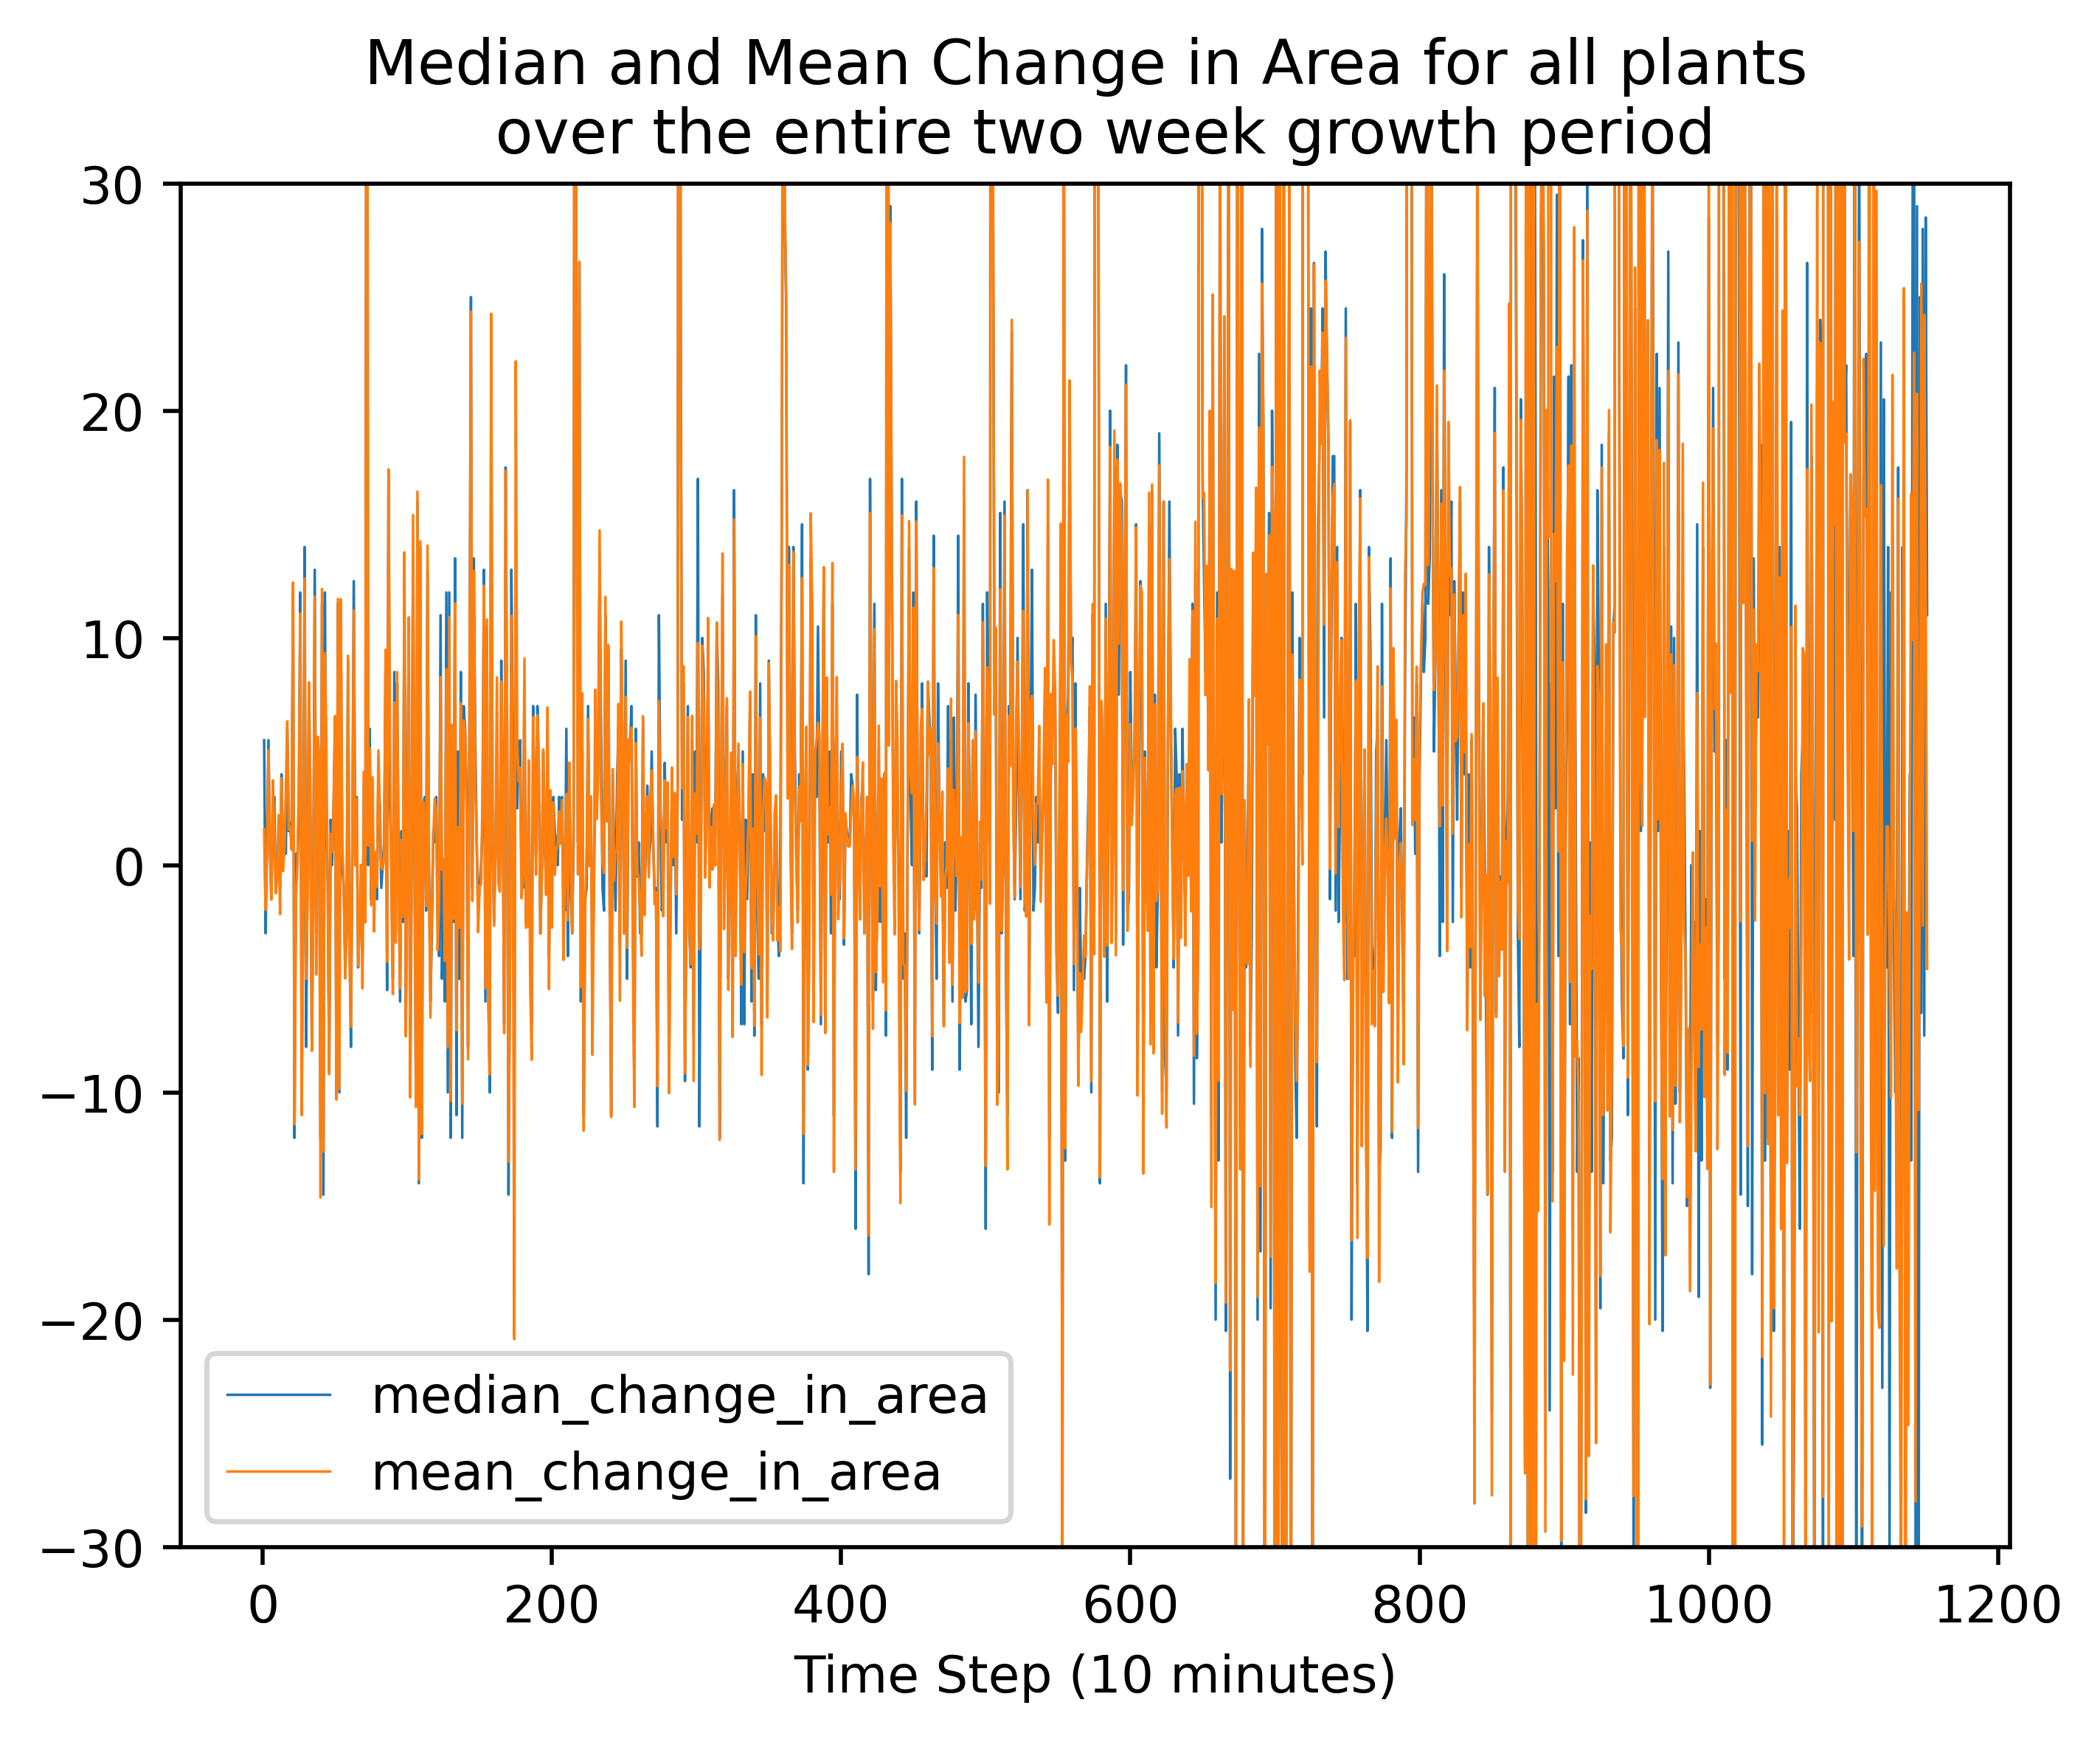

In [129]:
plt.figure(dpi=500)
plt.ylim(-30, 30)
plt.plot(delta_df['median_change'], label='median_change_in_area', linewidth=0.5)
plt.plot(delta_df['mean_change'], label='mean_change_in_area', linewidth=0.5)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n over the entire two week growth period")
plt.legend()
plt.show()

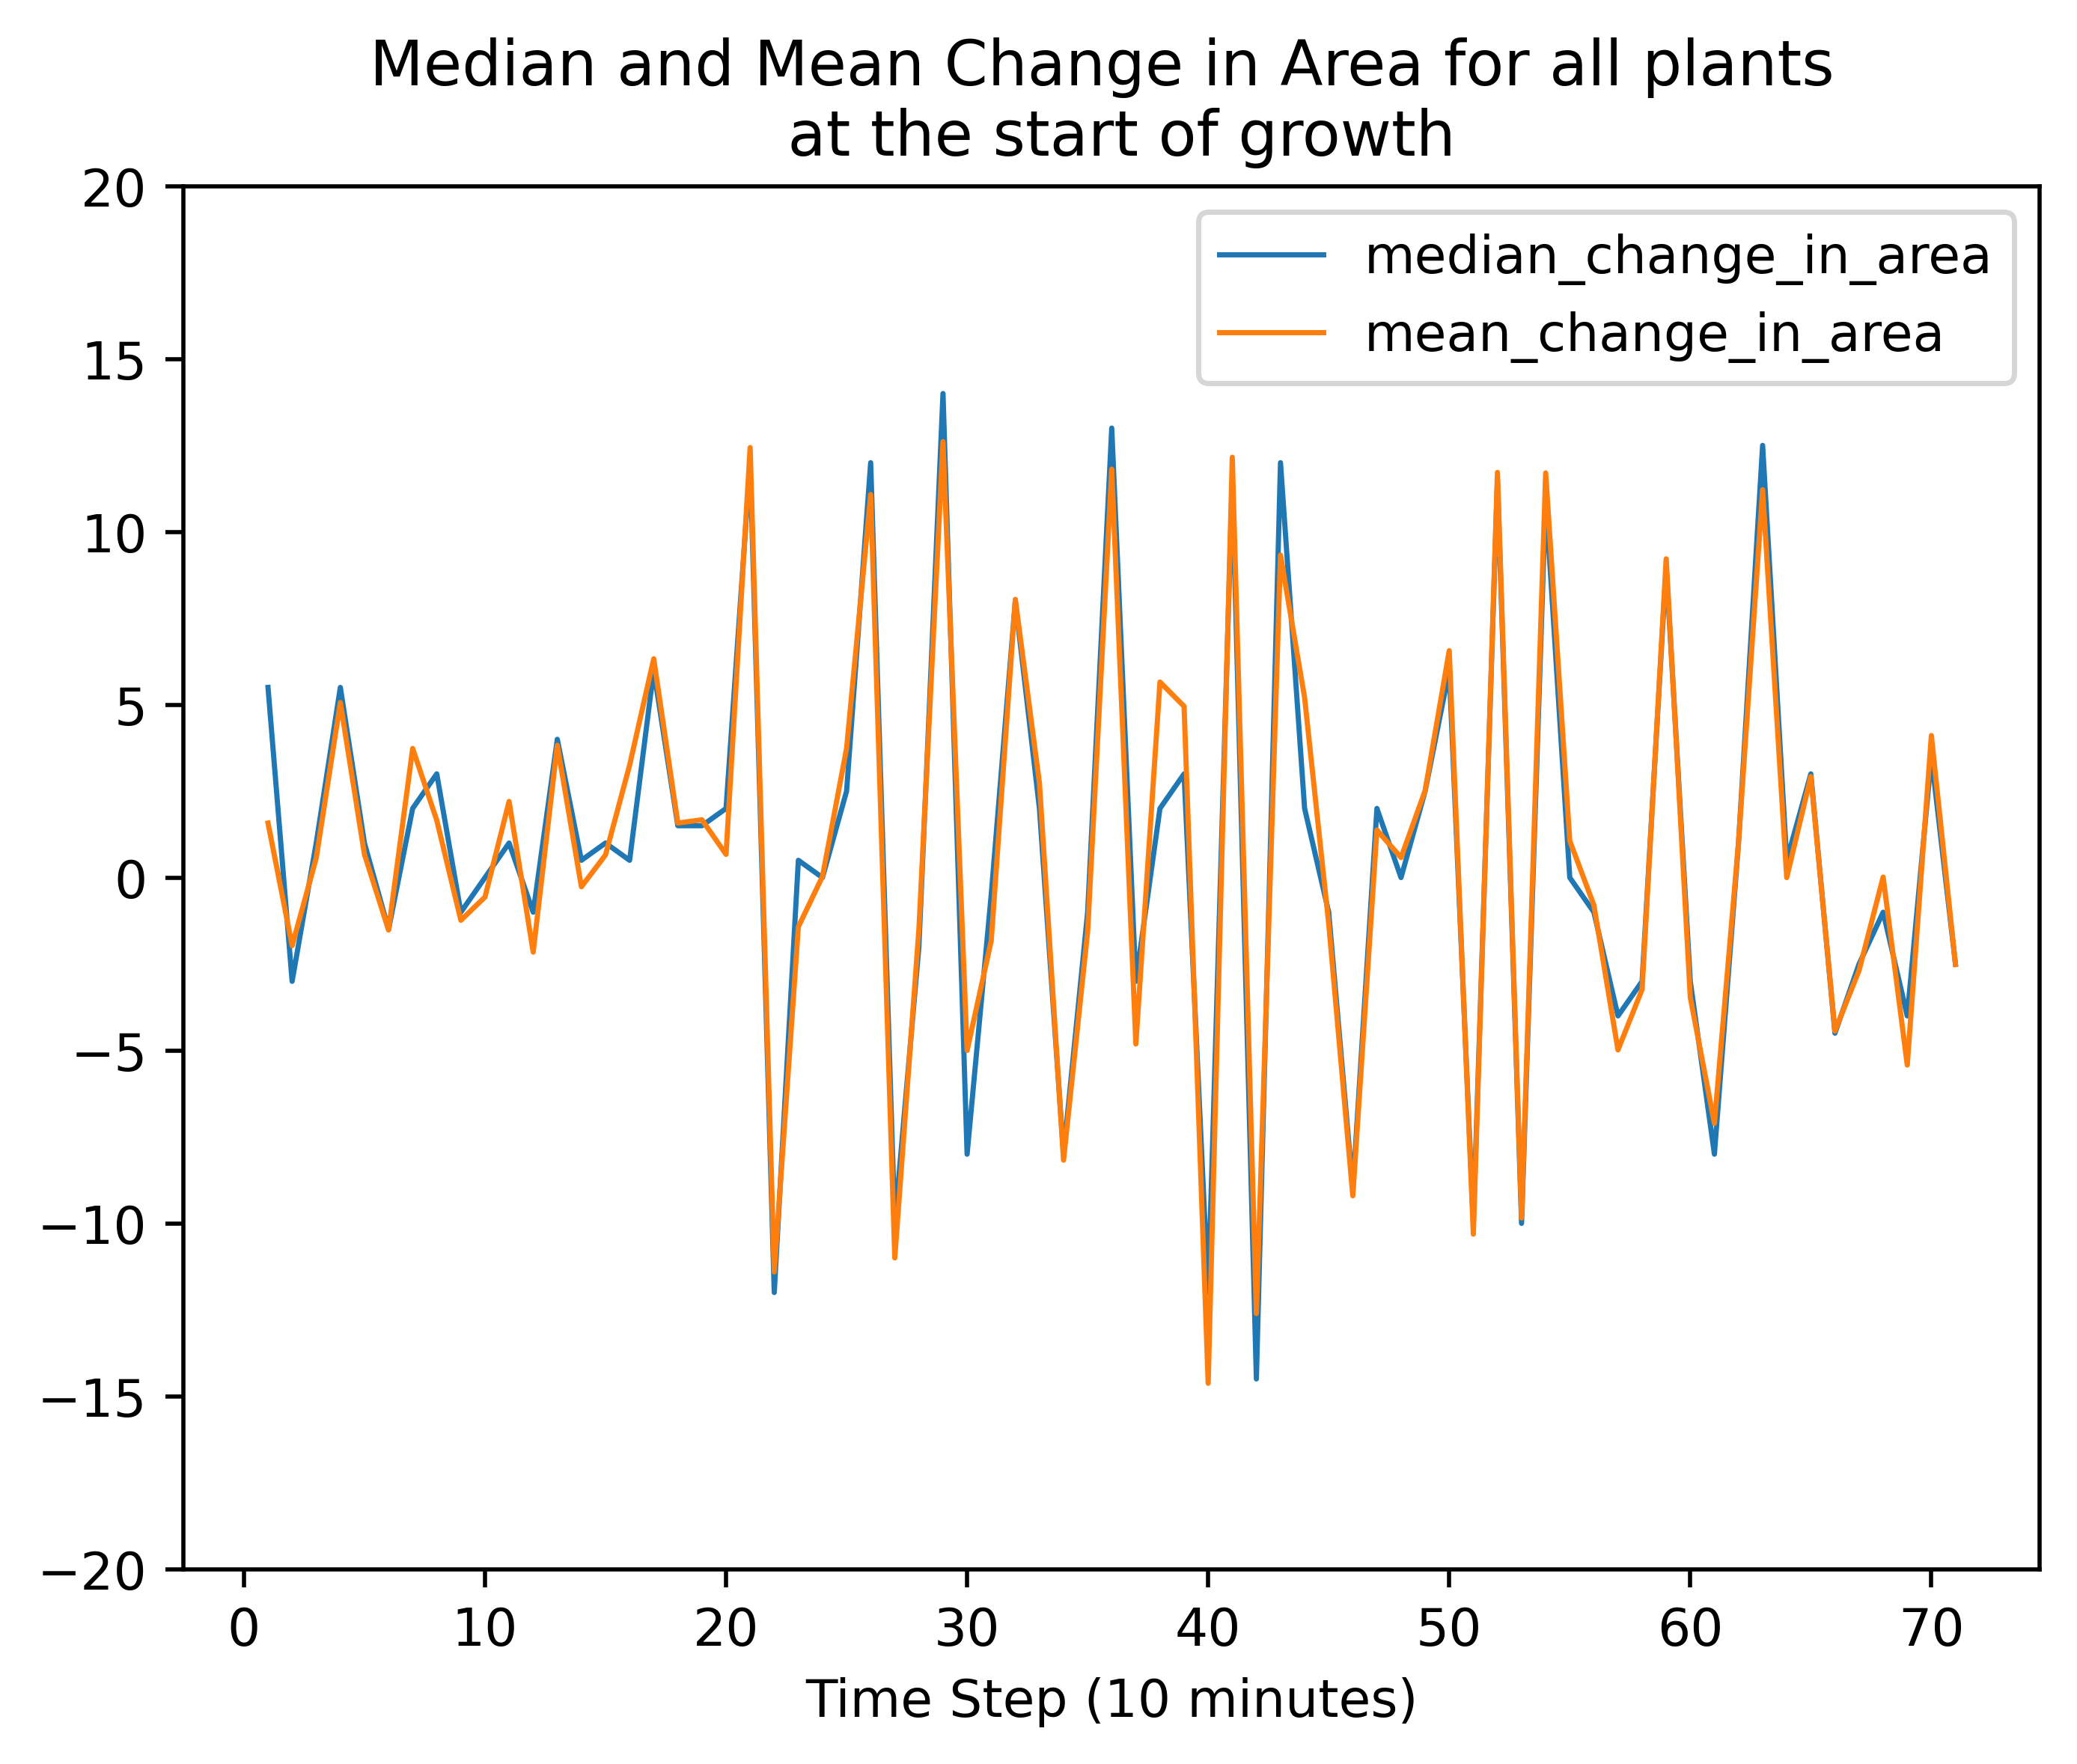

In [130]:
plt.figure(dpi=500)
plt.ylim(-20, 20)
plt.plot(delta_df['median_change'][:71], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][:71], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n at the start of growth")
plt.legend()
plt.show()

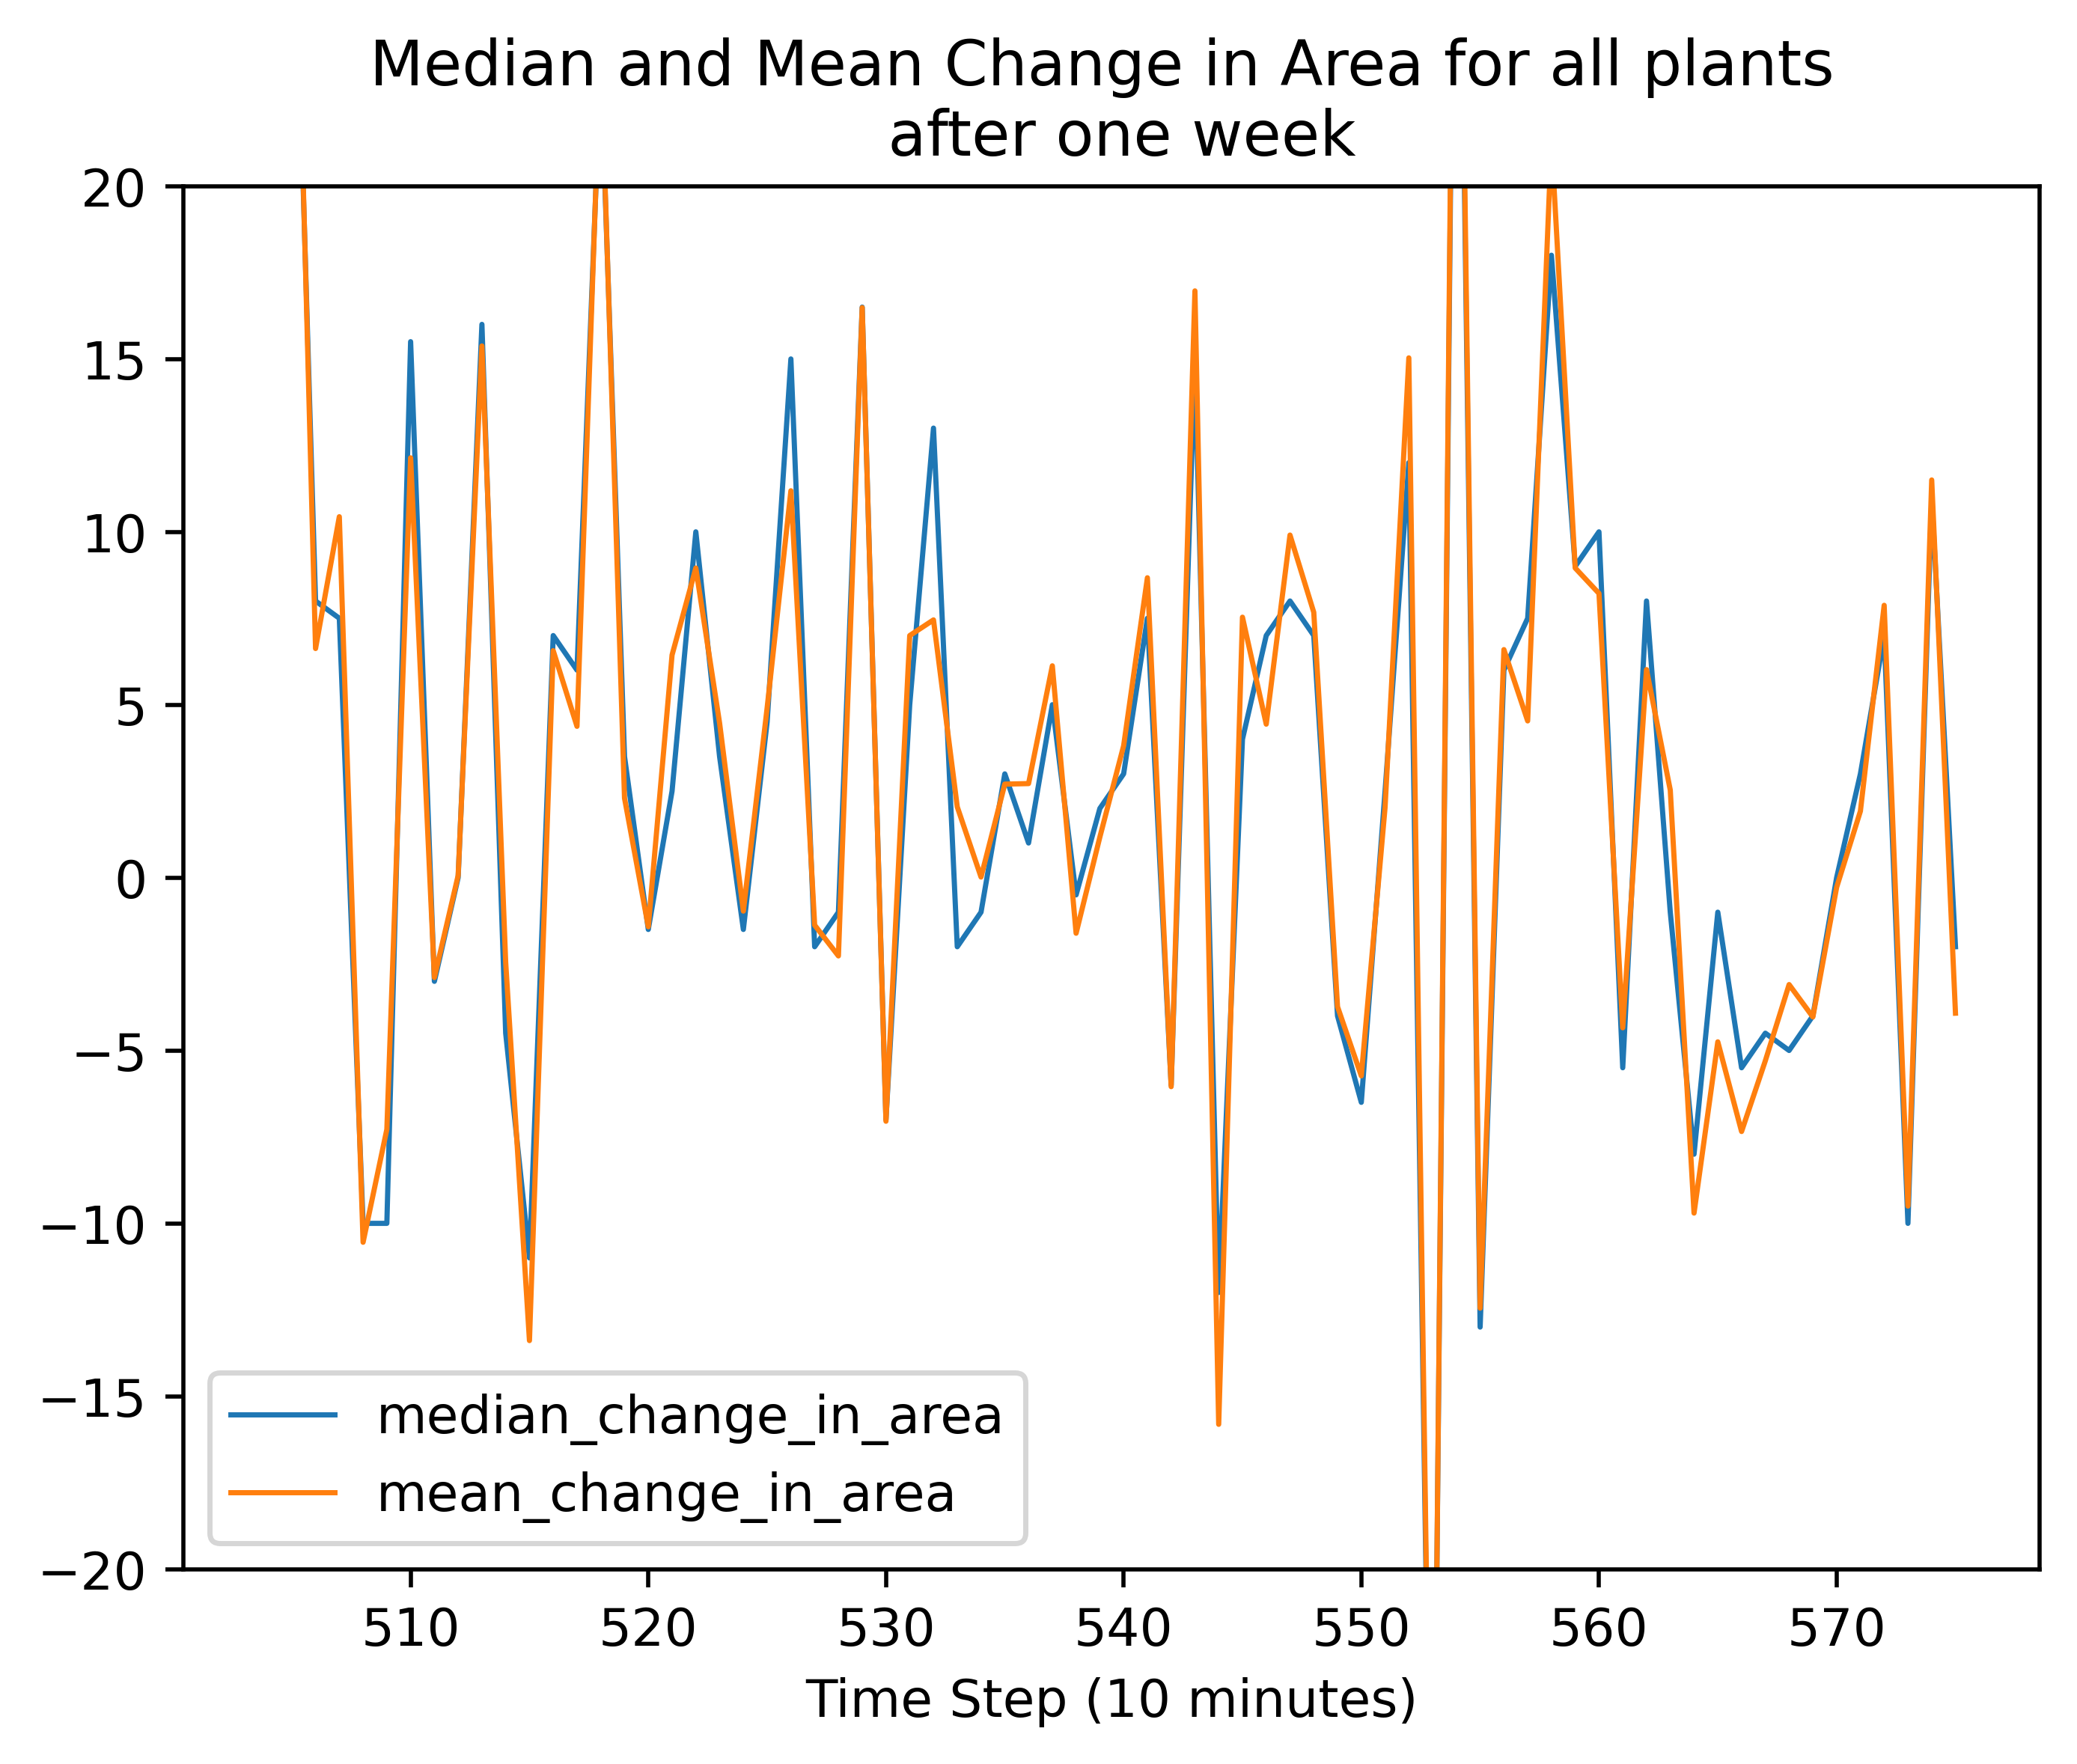

In [134]:
plt.figure(dpi=500)
plt.ylim(-20, 20)
plt.plot(delta_df['median_change'][503:575], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][503:575], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n after one week")
plt.legend()
plt.show()

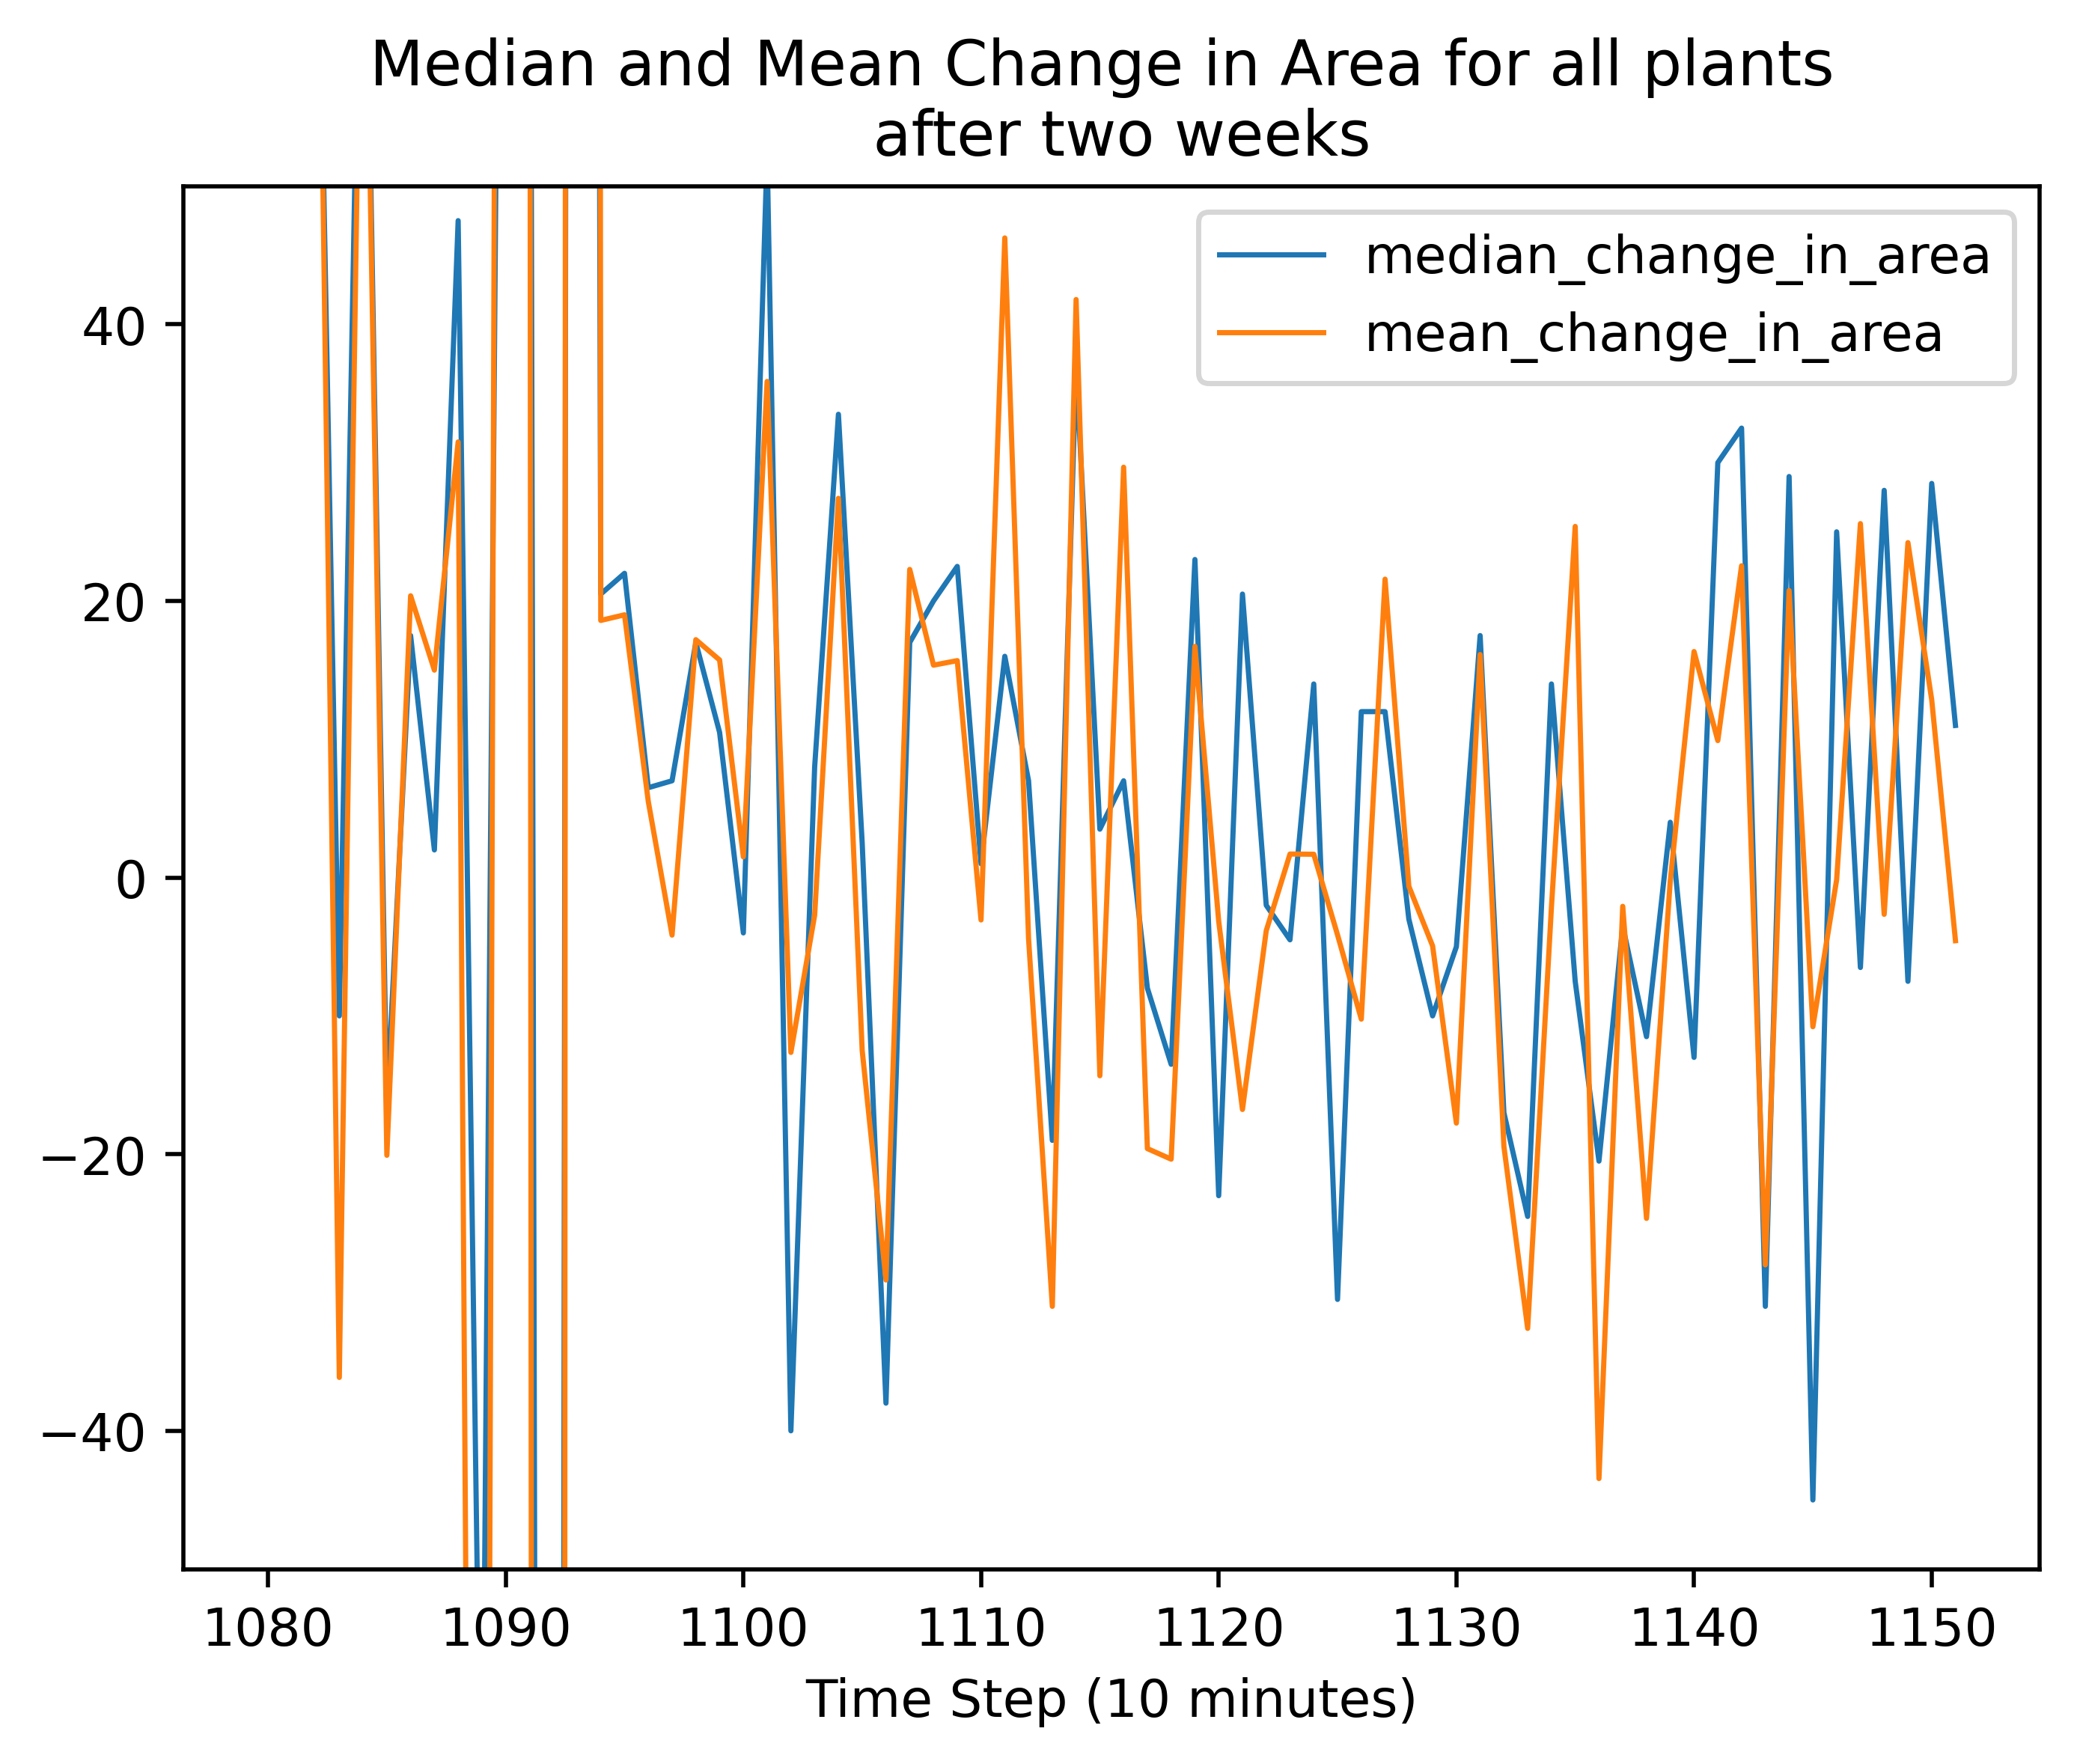

In [136]:
plt.figure(dpi=500)
plt.ylim(-50, 50)
plt.plot(delta_df['median_change'][1079:], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][1079:], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n after two weeks")
plt.legend()
plt.show()

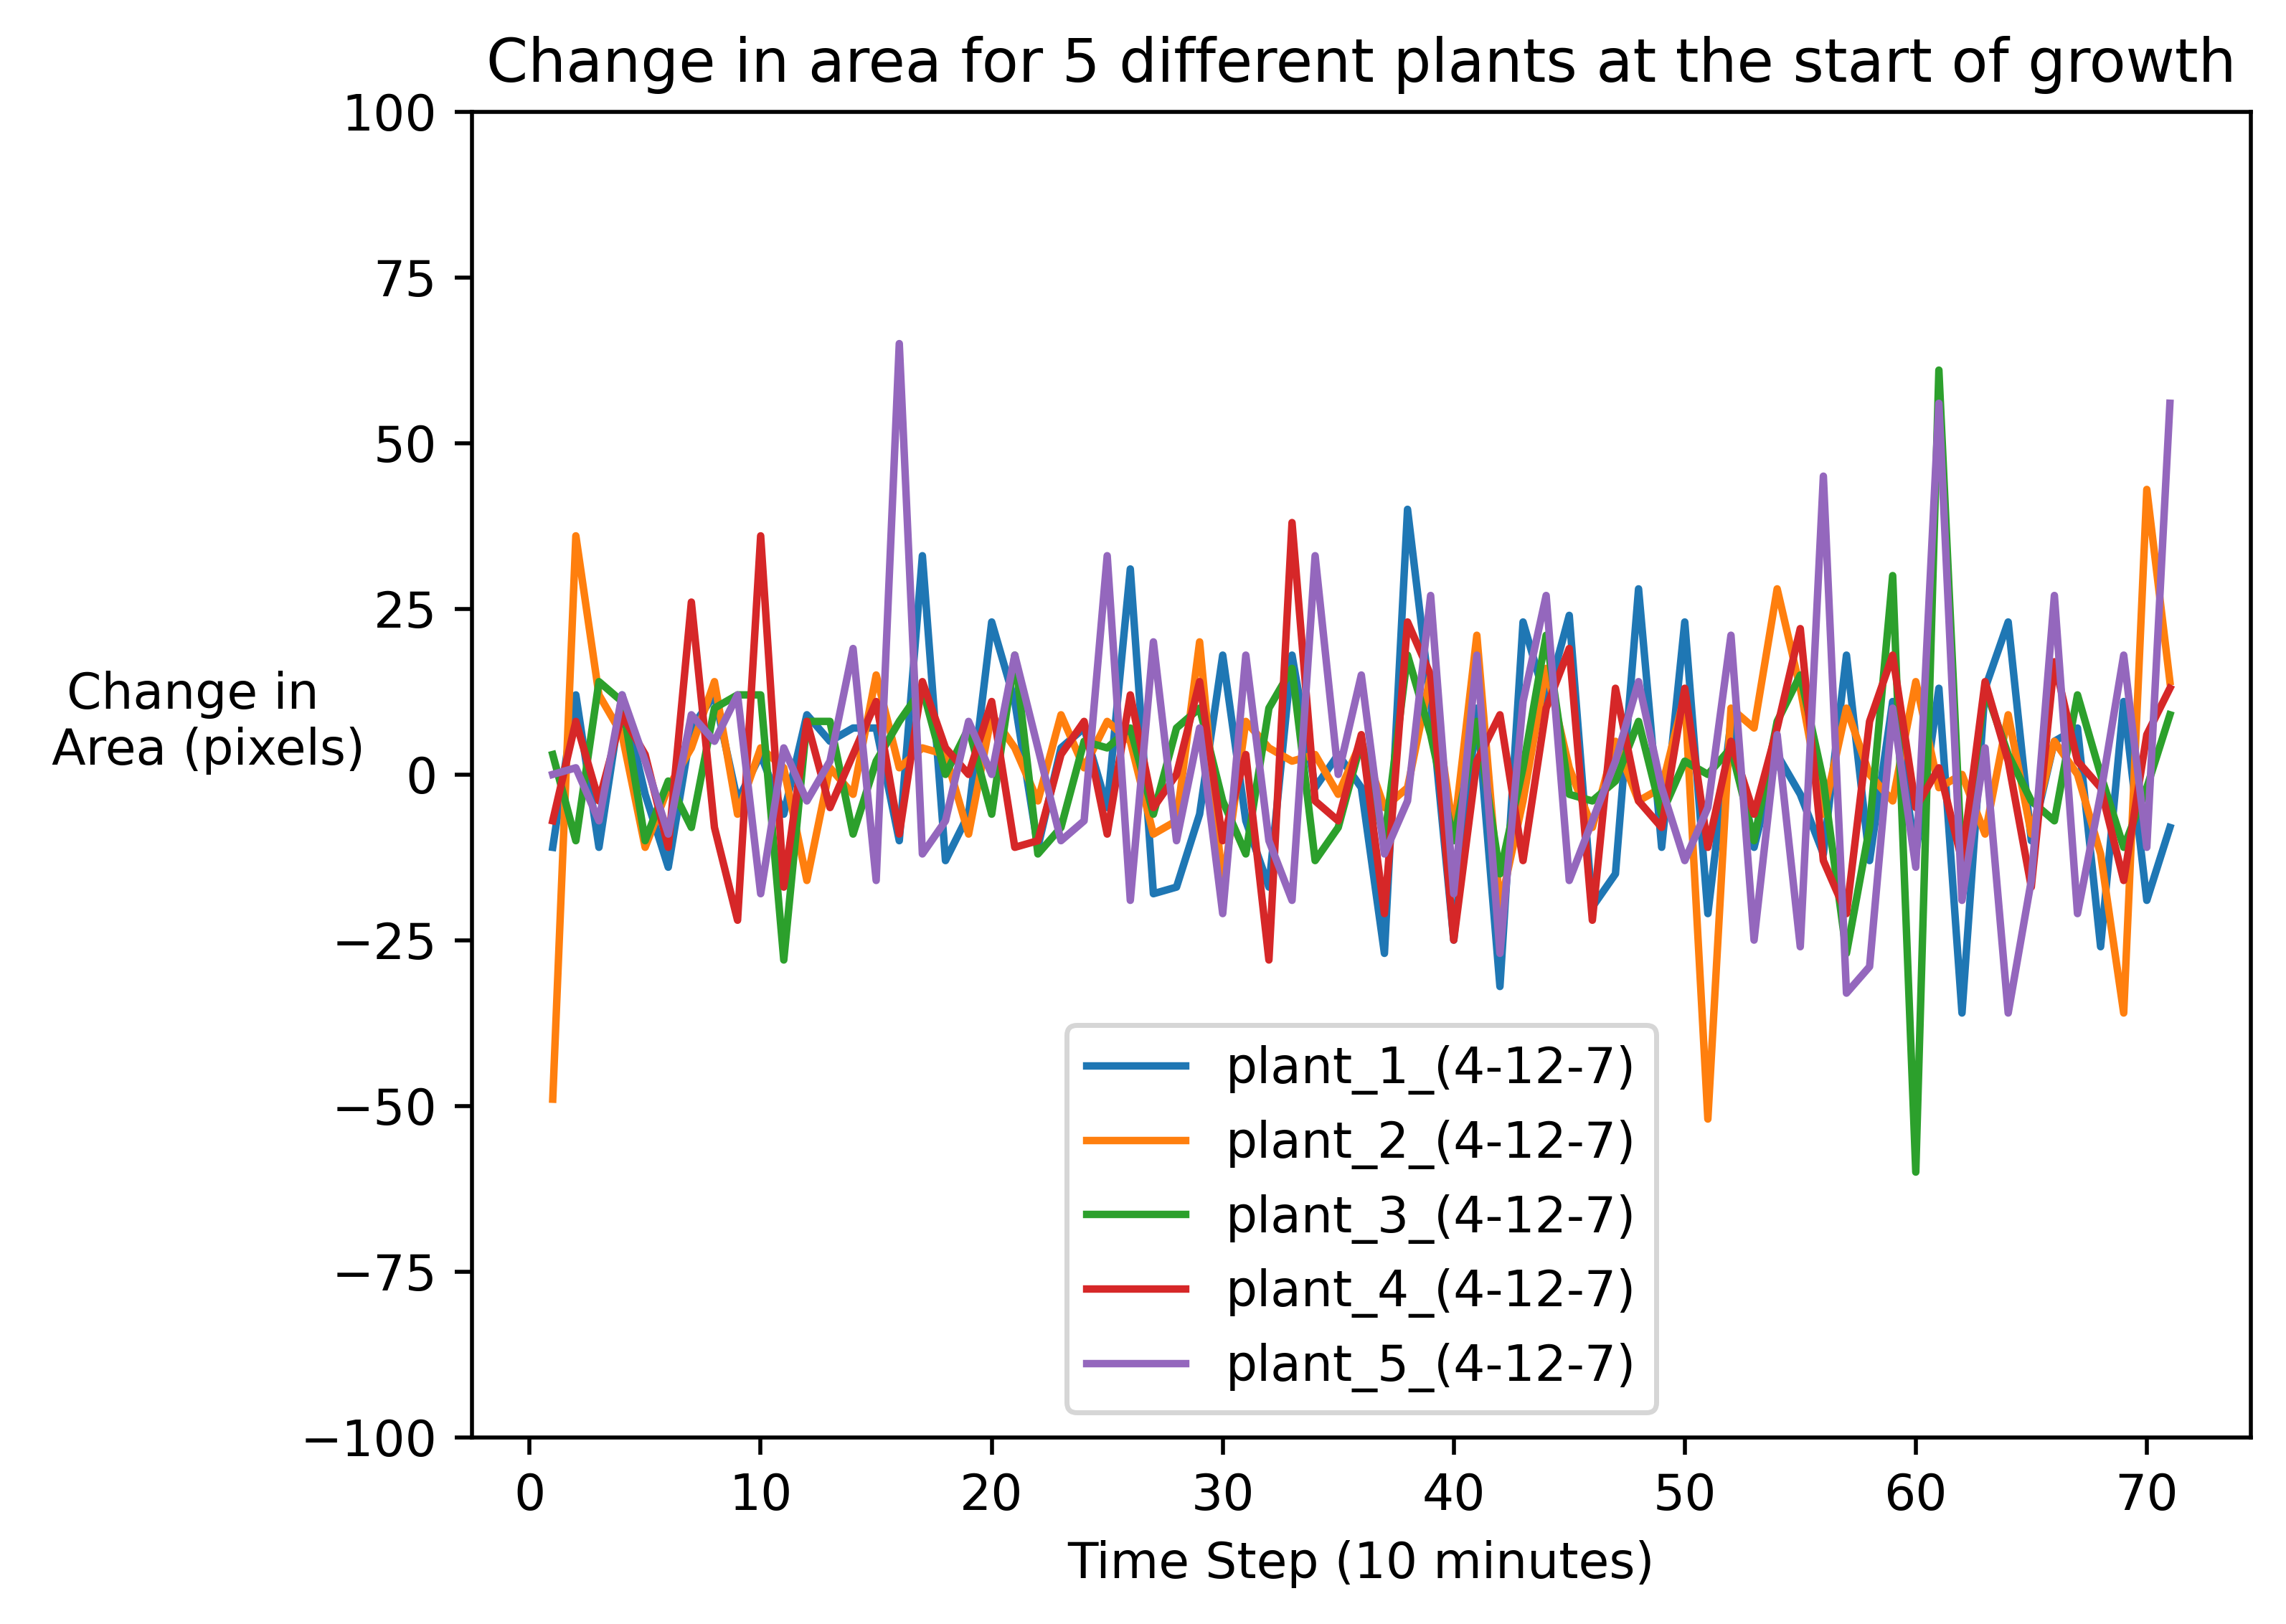

In [139]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[:71, 1:6]
for plant in example_plants.columns:
    label = ' '.join(plant.split()[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-100, 100)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n Area (pixels)', rotation=0, labelpad=20)
plt.title("Change in area for 5 different plants at the start of growth")
plt.legend()
plt.show()

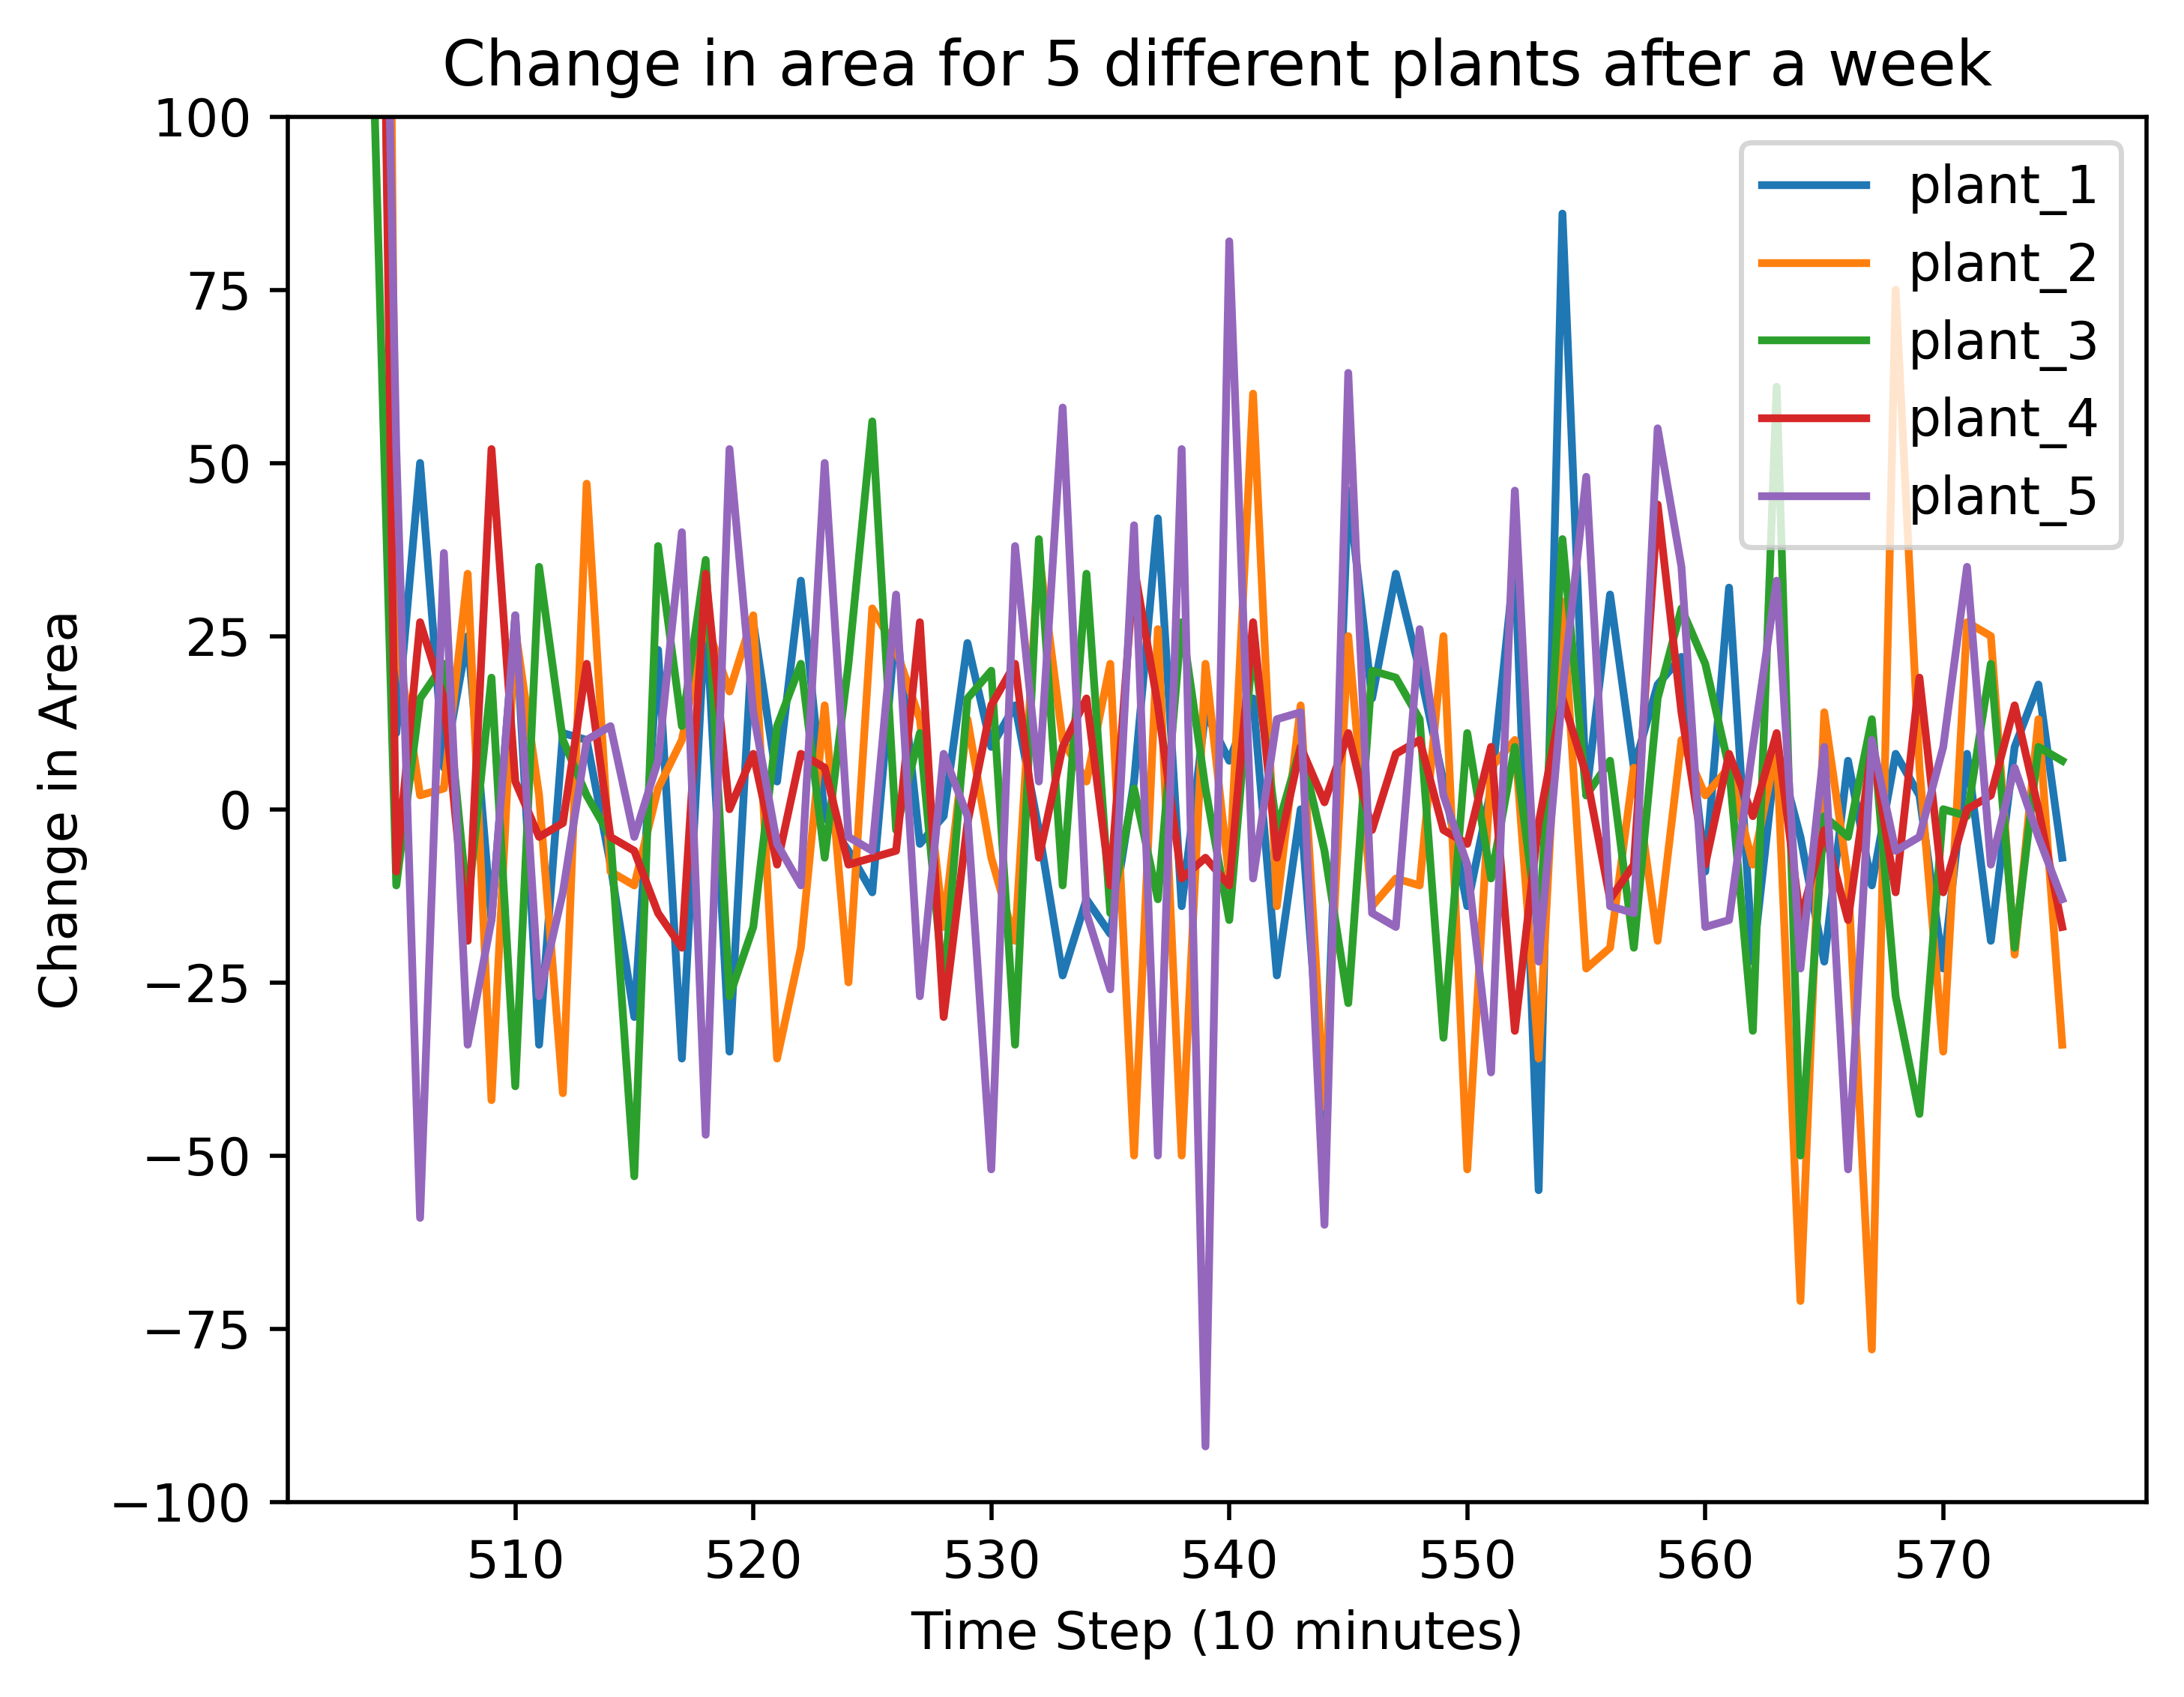

In [122]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[503:575, 1:6]
for plant in example_plants.columns:
    label = '_'.join(plant.split('_')[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-100, 100)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n Area (pixels)', rotation=0, labelpad=20)
plt.title("Change in area for 5 different plants after a week")
plt.legend()
plt.show()

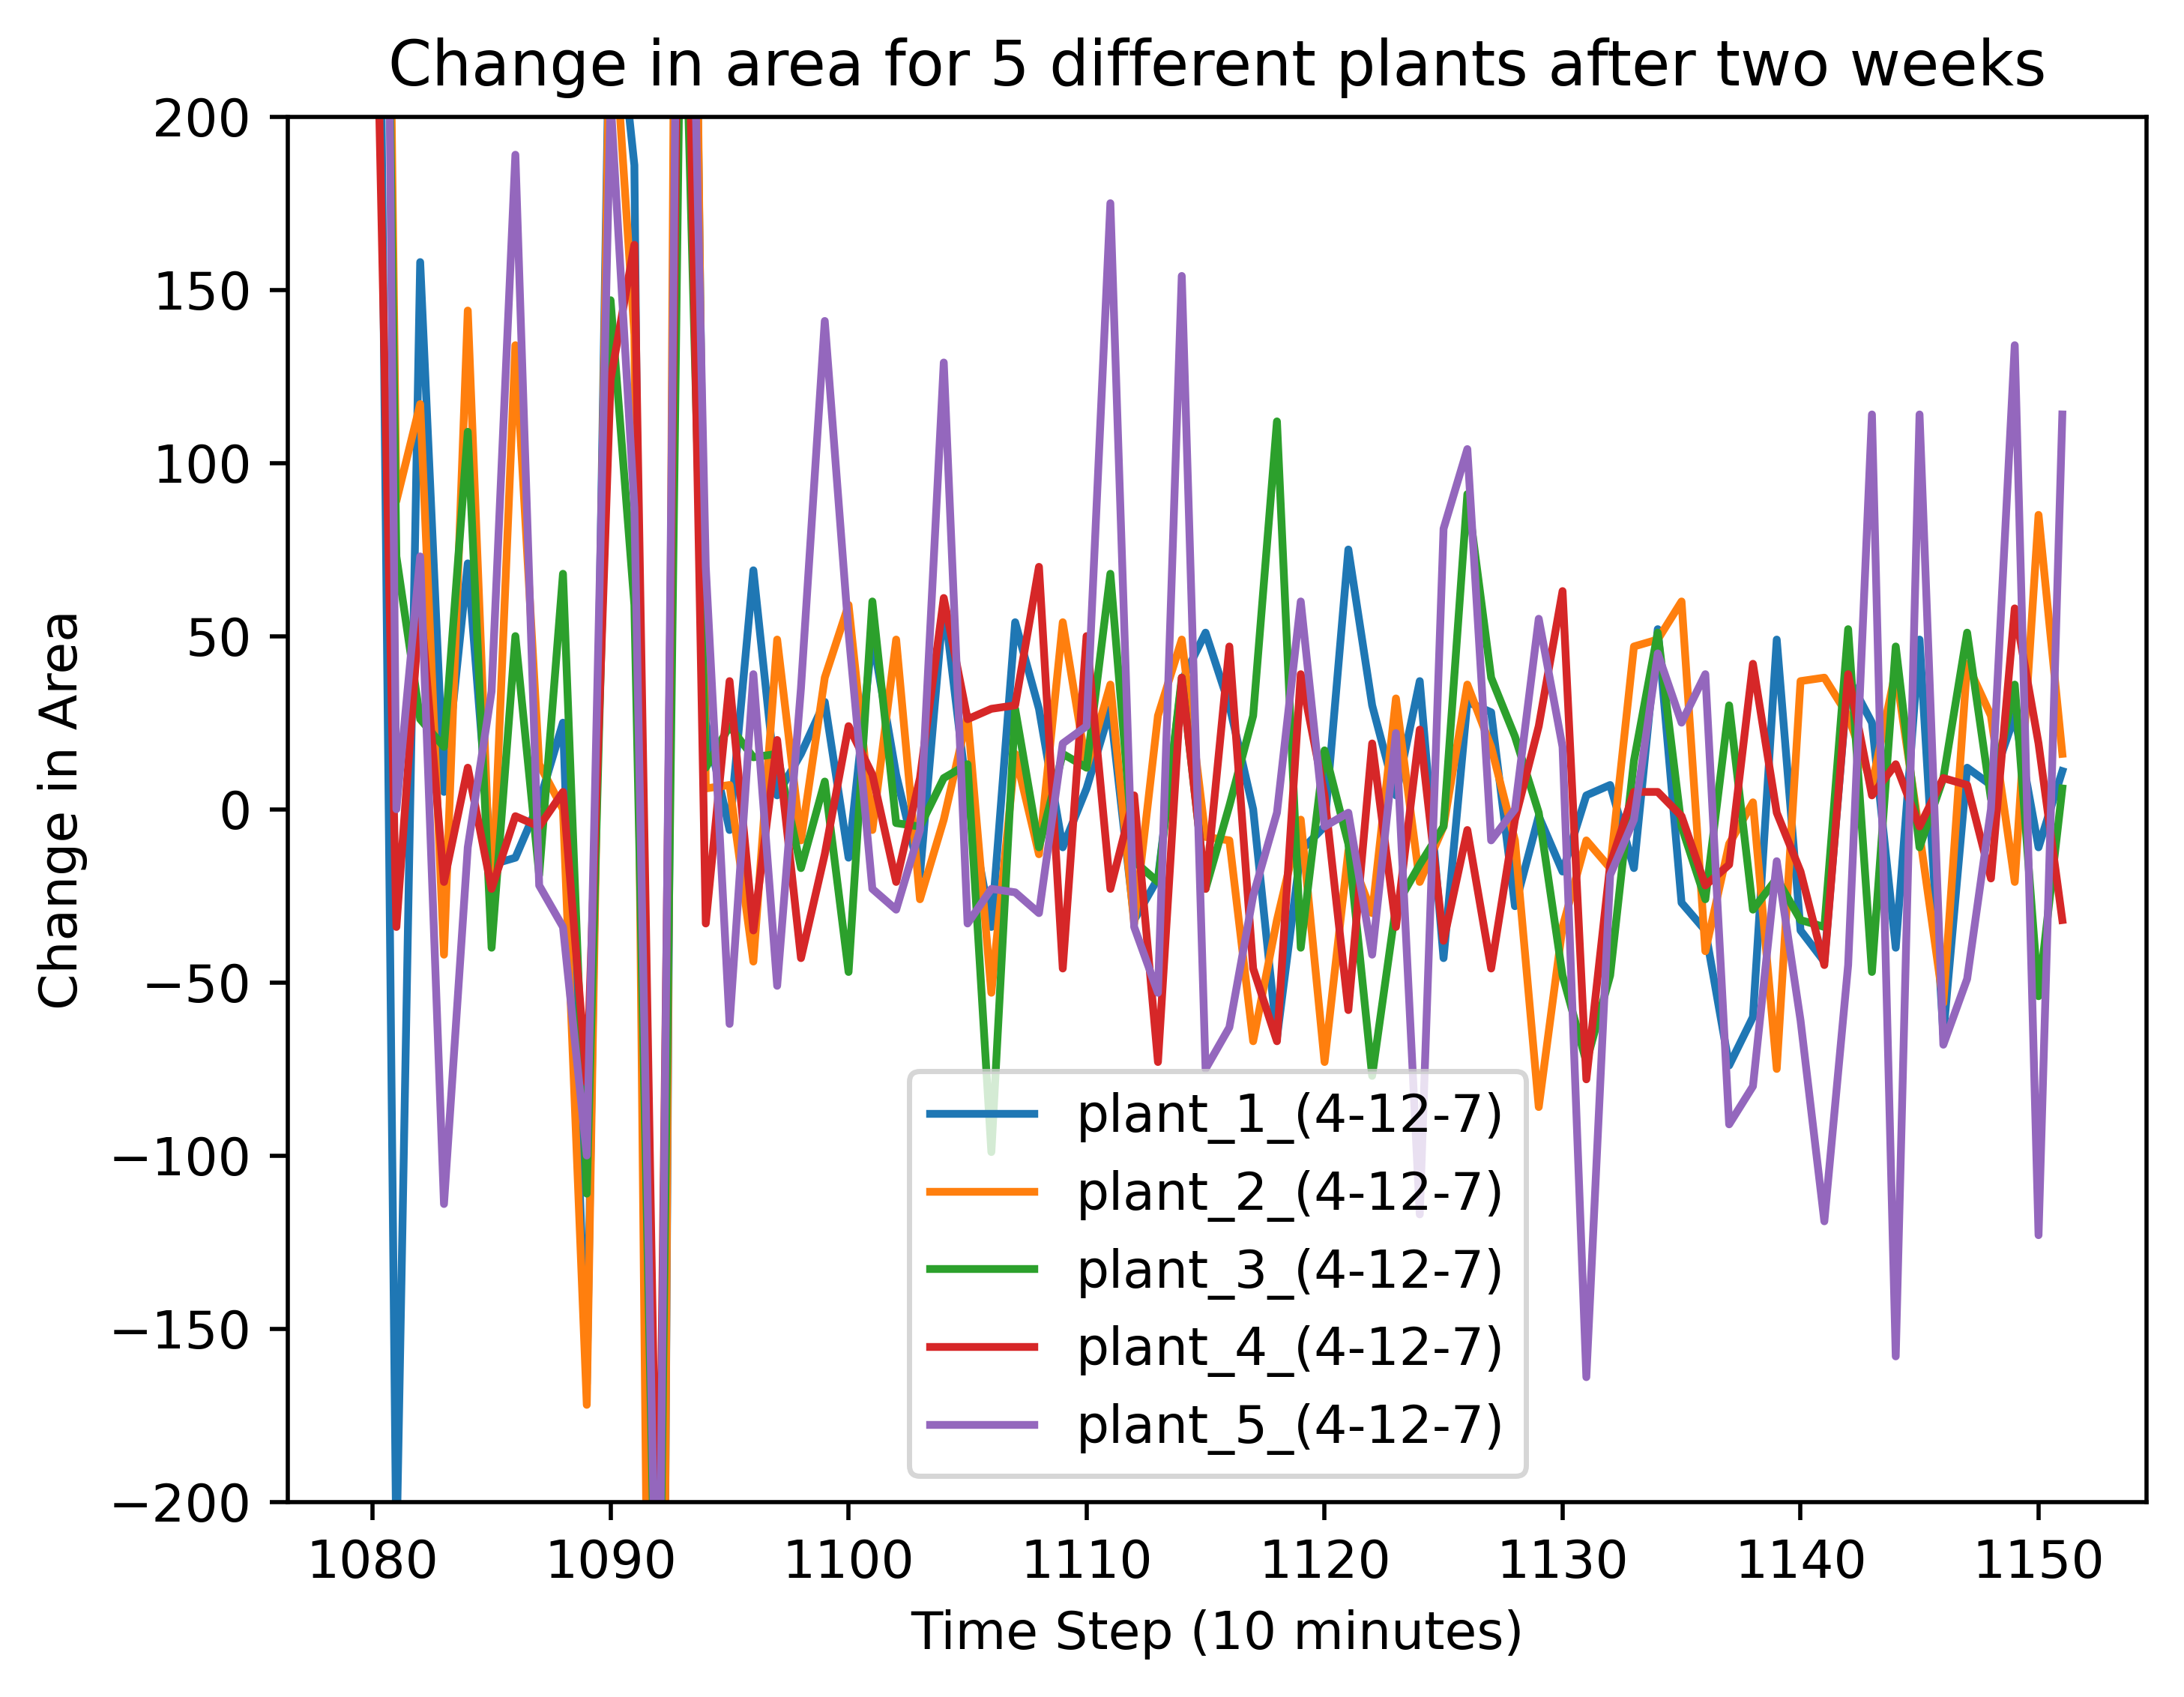

In [123]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[1079:, 1:6]
for plant in example_plants.columns:
    label = ' '.join(plant.split()[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-200, 200)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n Area (pixels)', rotation=0, labelpad=20)
plt.title("Change in area for 5 different plants after two weeks")
plt.legend()
plt.show()

#### Plots for Standup 1/24/24

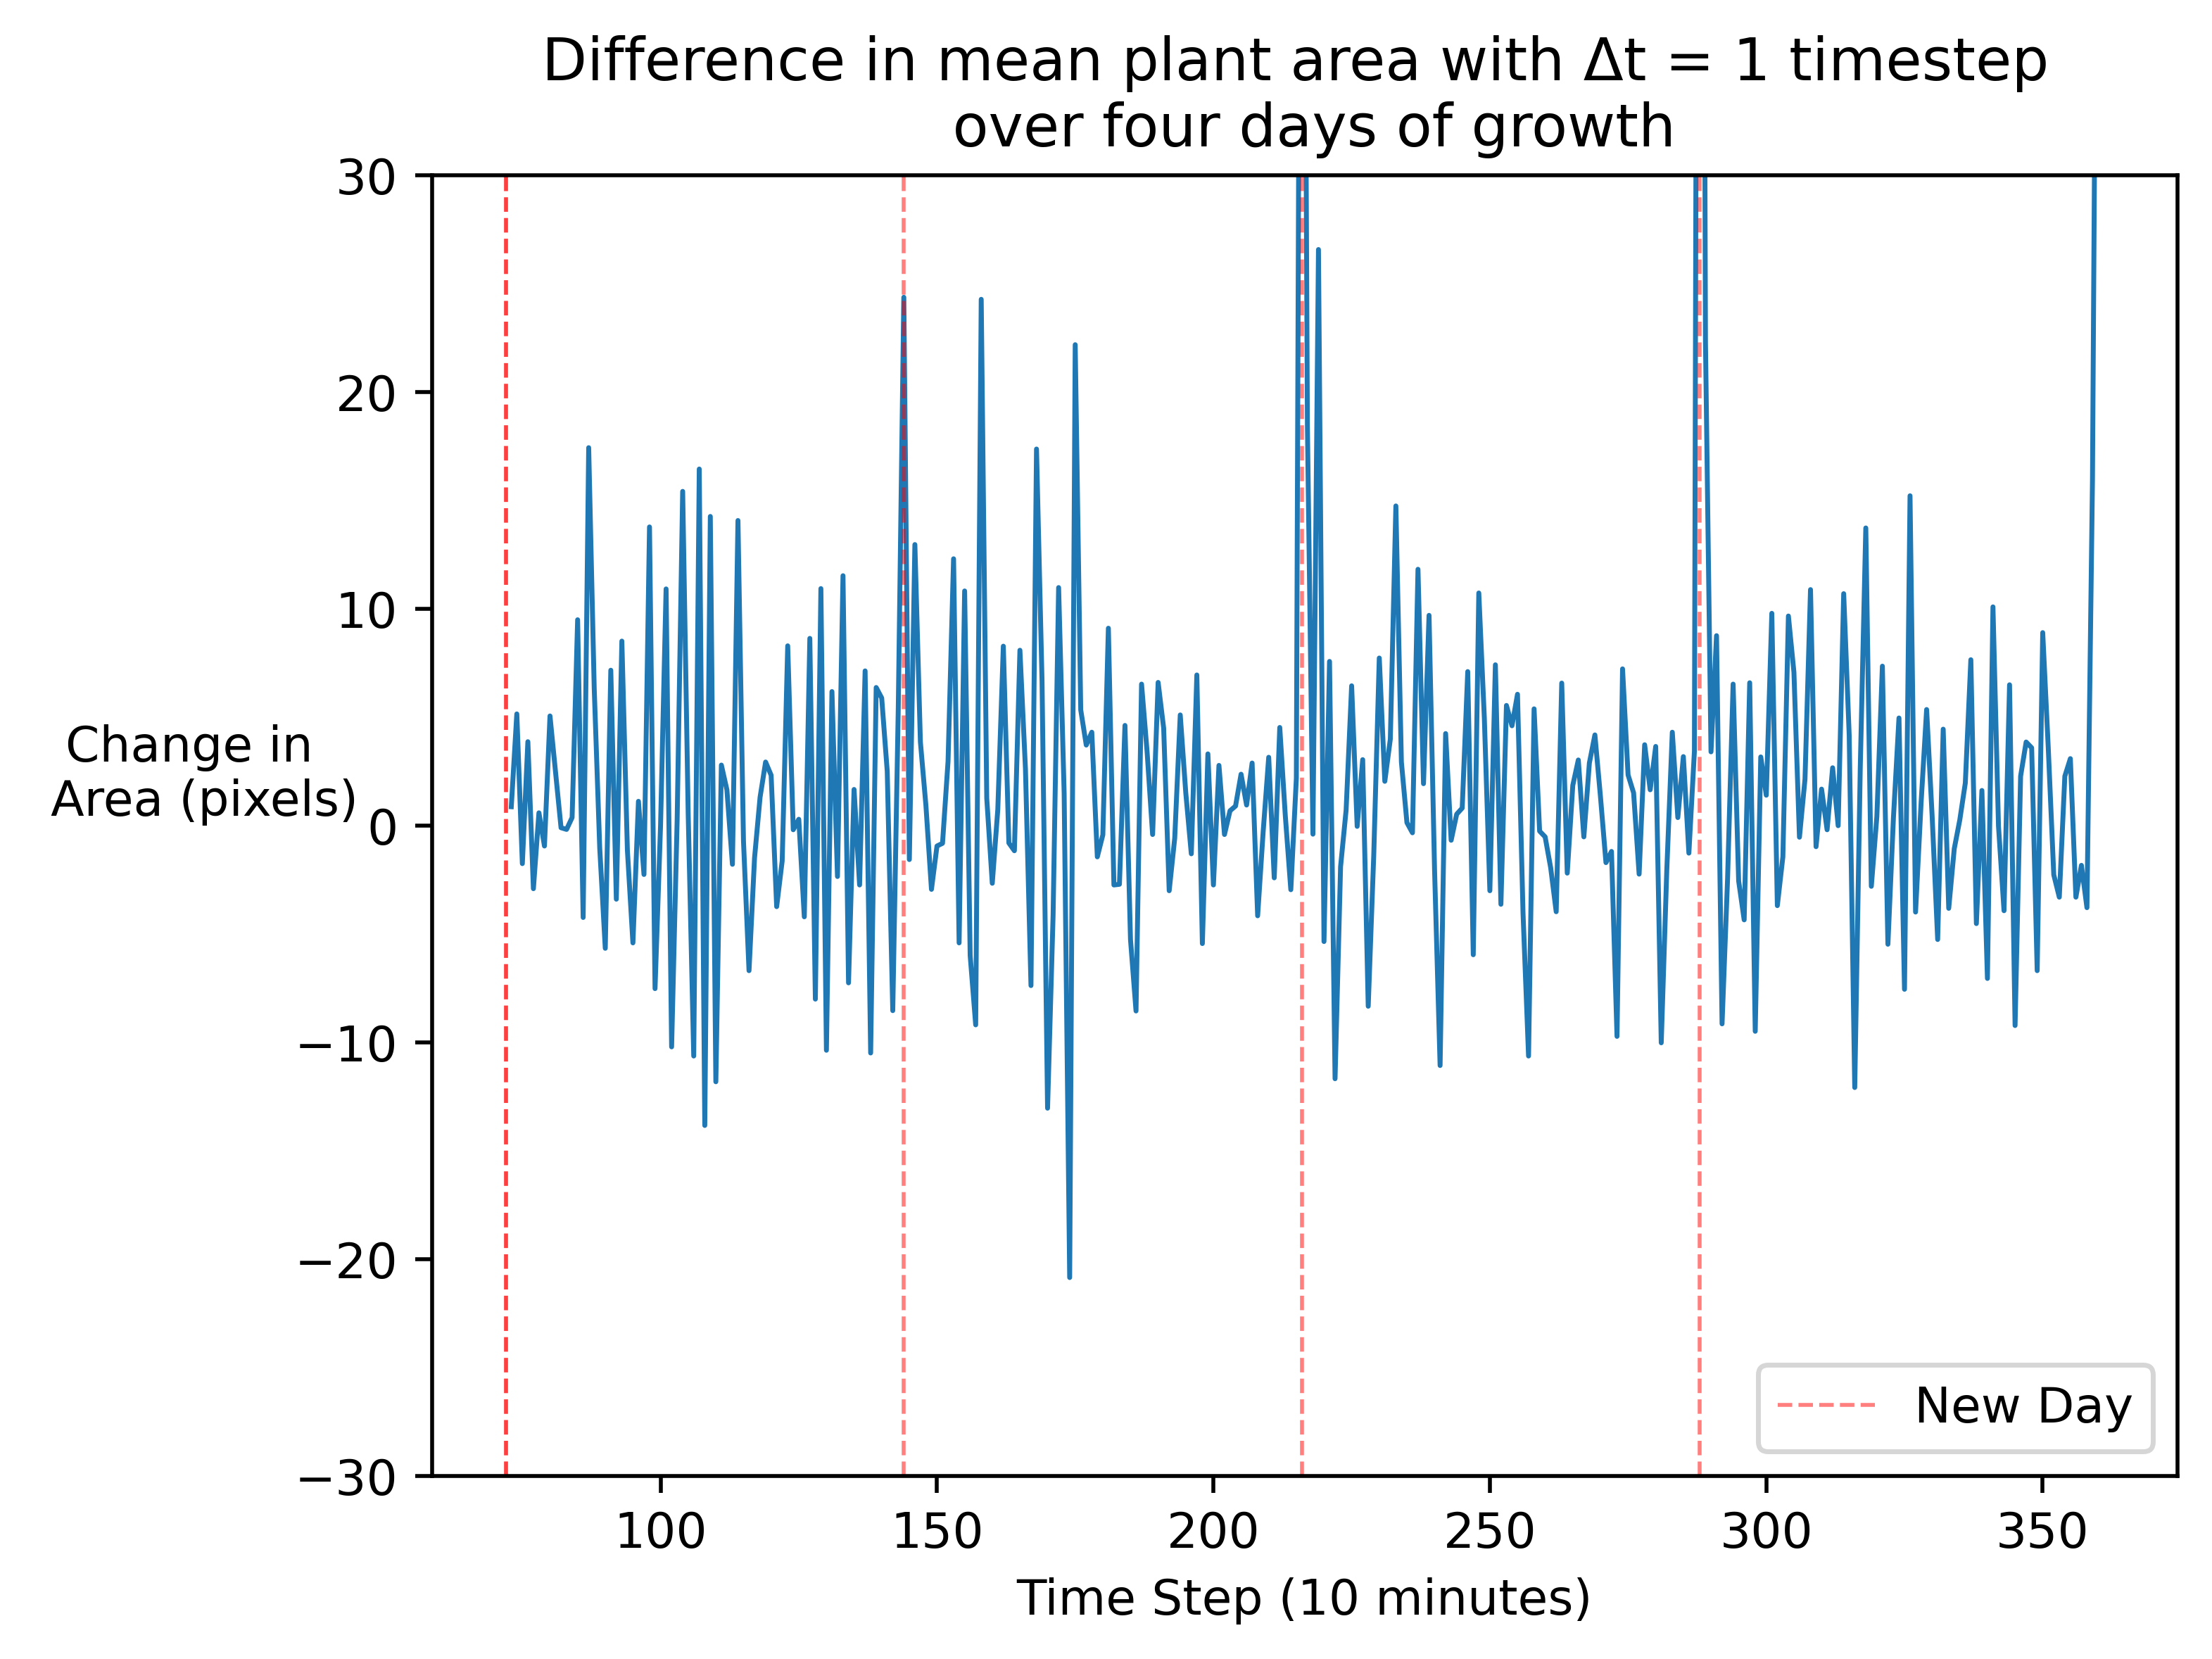

In [124]:
plt.figure(dpi=500)
plt.ylim(-30, 30)
plt.plot(delta_df['mean_change'][72:360], linewidth=1)
for i in range(72, 360, 72):
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
plt.axvline(x=72, color='red', linestyle='--', alpha=0.5, linewidth=0.8, label='New Day')
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n Area (pixels)', rotation=0, labelpad=20)
plt.title("Difference in mean plant area with Δt = 1 timestep \n over four days of growth")
plt.legend()
plt.show()

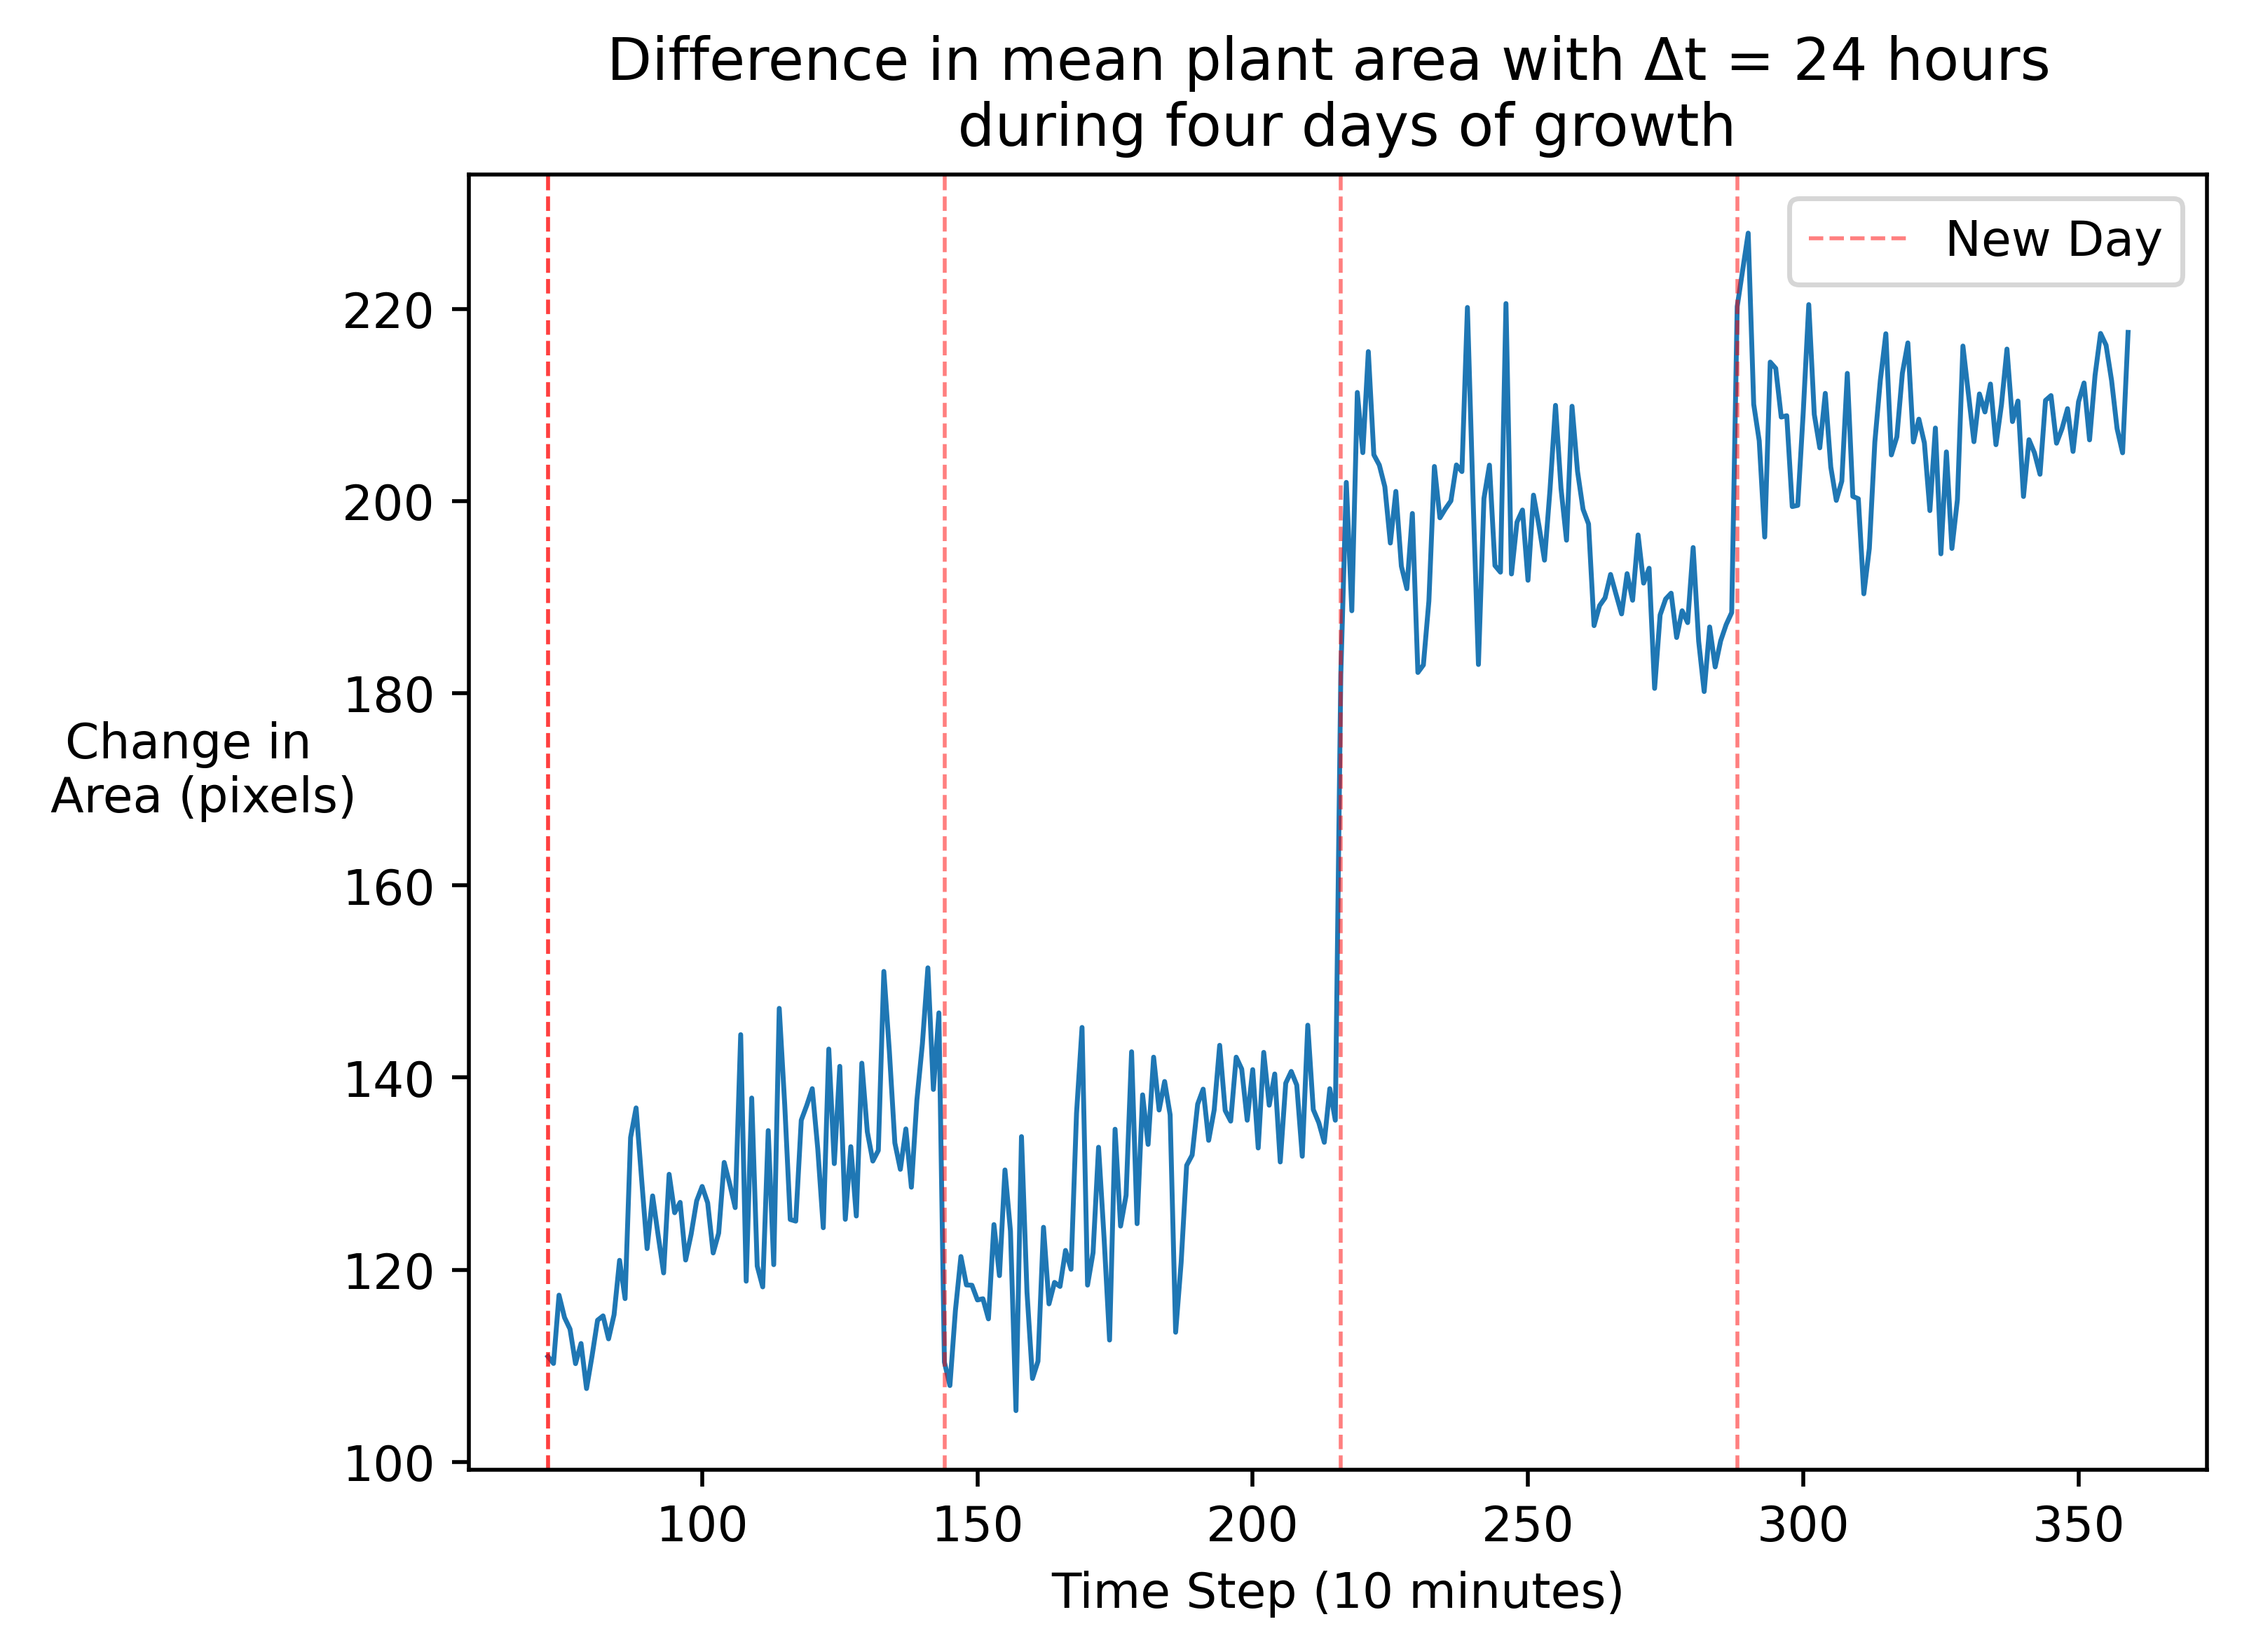

In [125]:
plt.figure(dpi=500)
#plt.ylim(-30, 30)
plt.plot(df_norm_lag['mean_lagged_delta'][0:288], linewidth=1)
for i in range(72, 360, 72):
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
plt.axvline(x=72, color='red', linestyle='--', alpha=0.5, linewidth=0.8, label='New Day')
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n Area (pixels)', rotation=0, labelpad=30)
plt.title("Difference in mean plant area with Δt = 24 hours \n during four days of growth")
plt.legend()
plt.show()

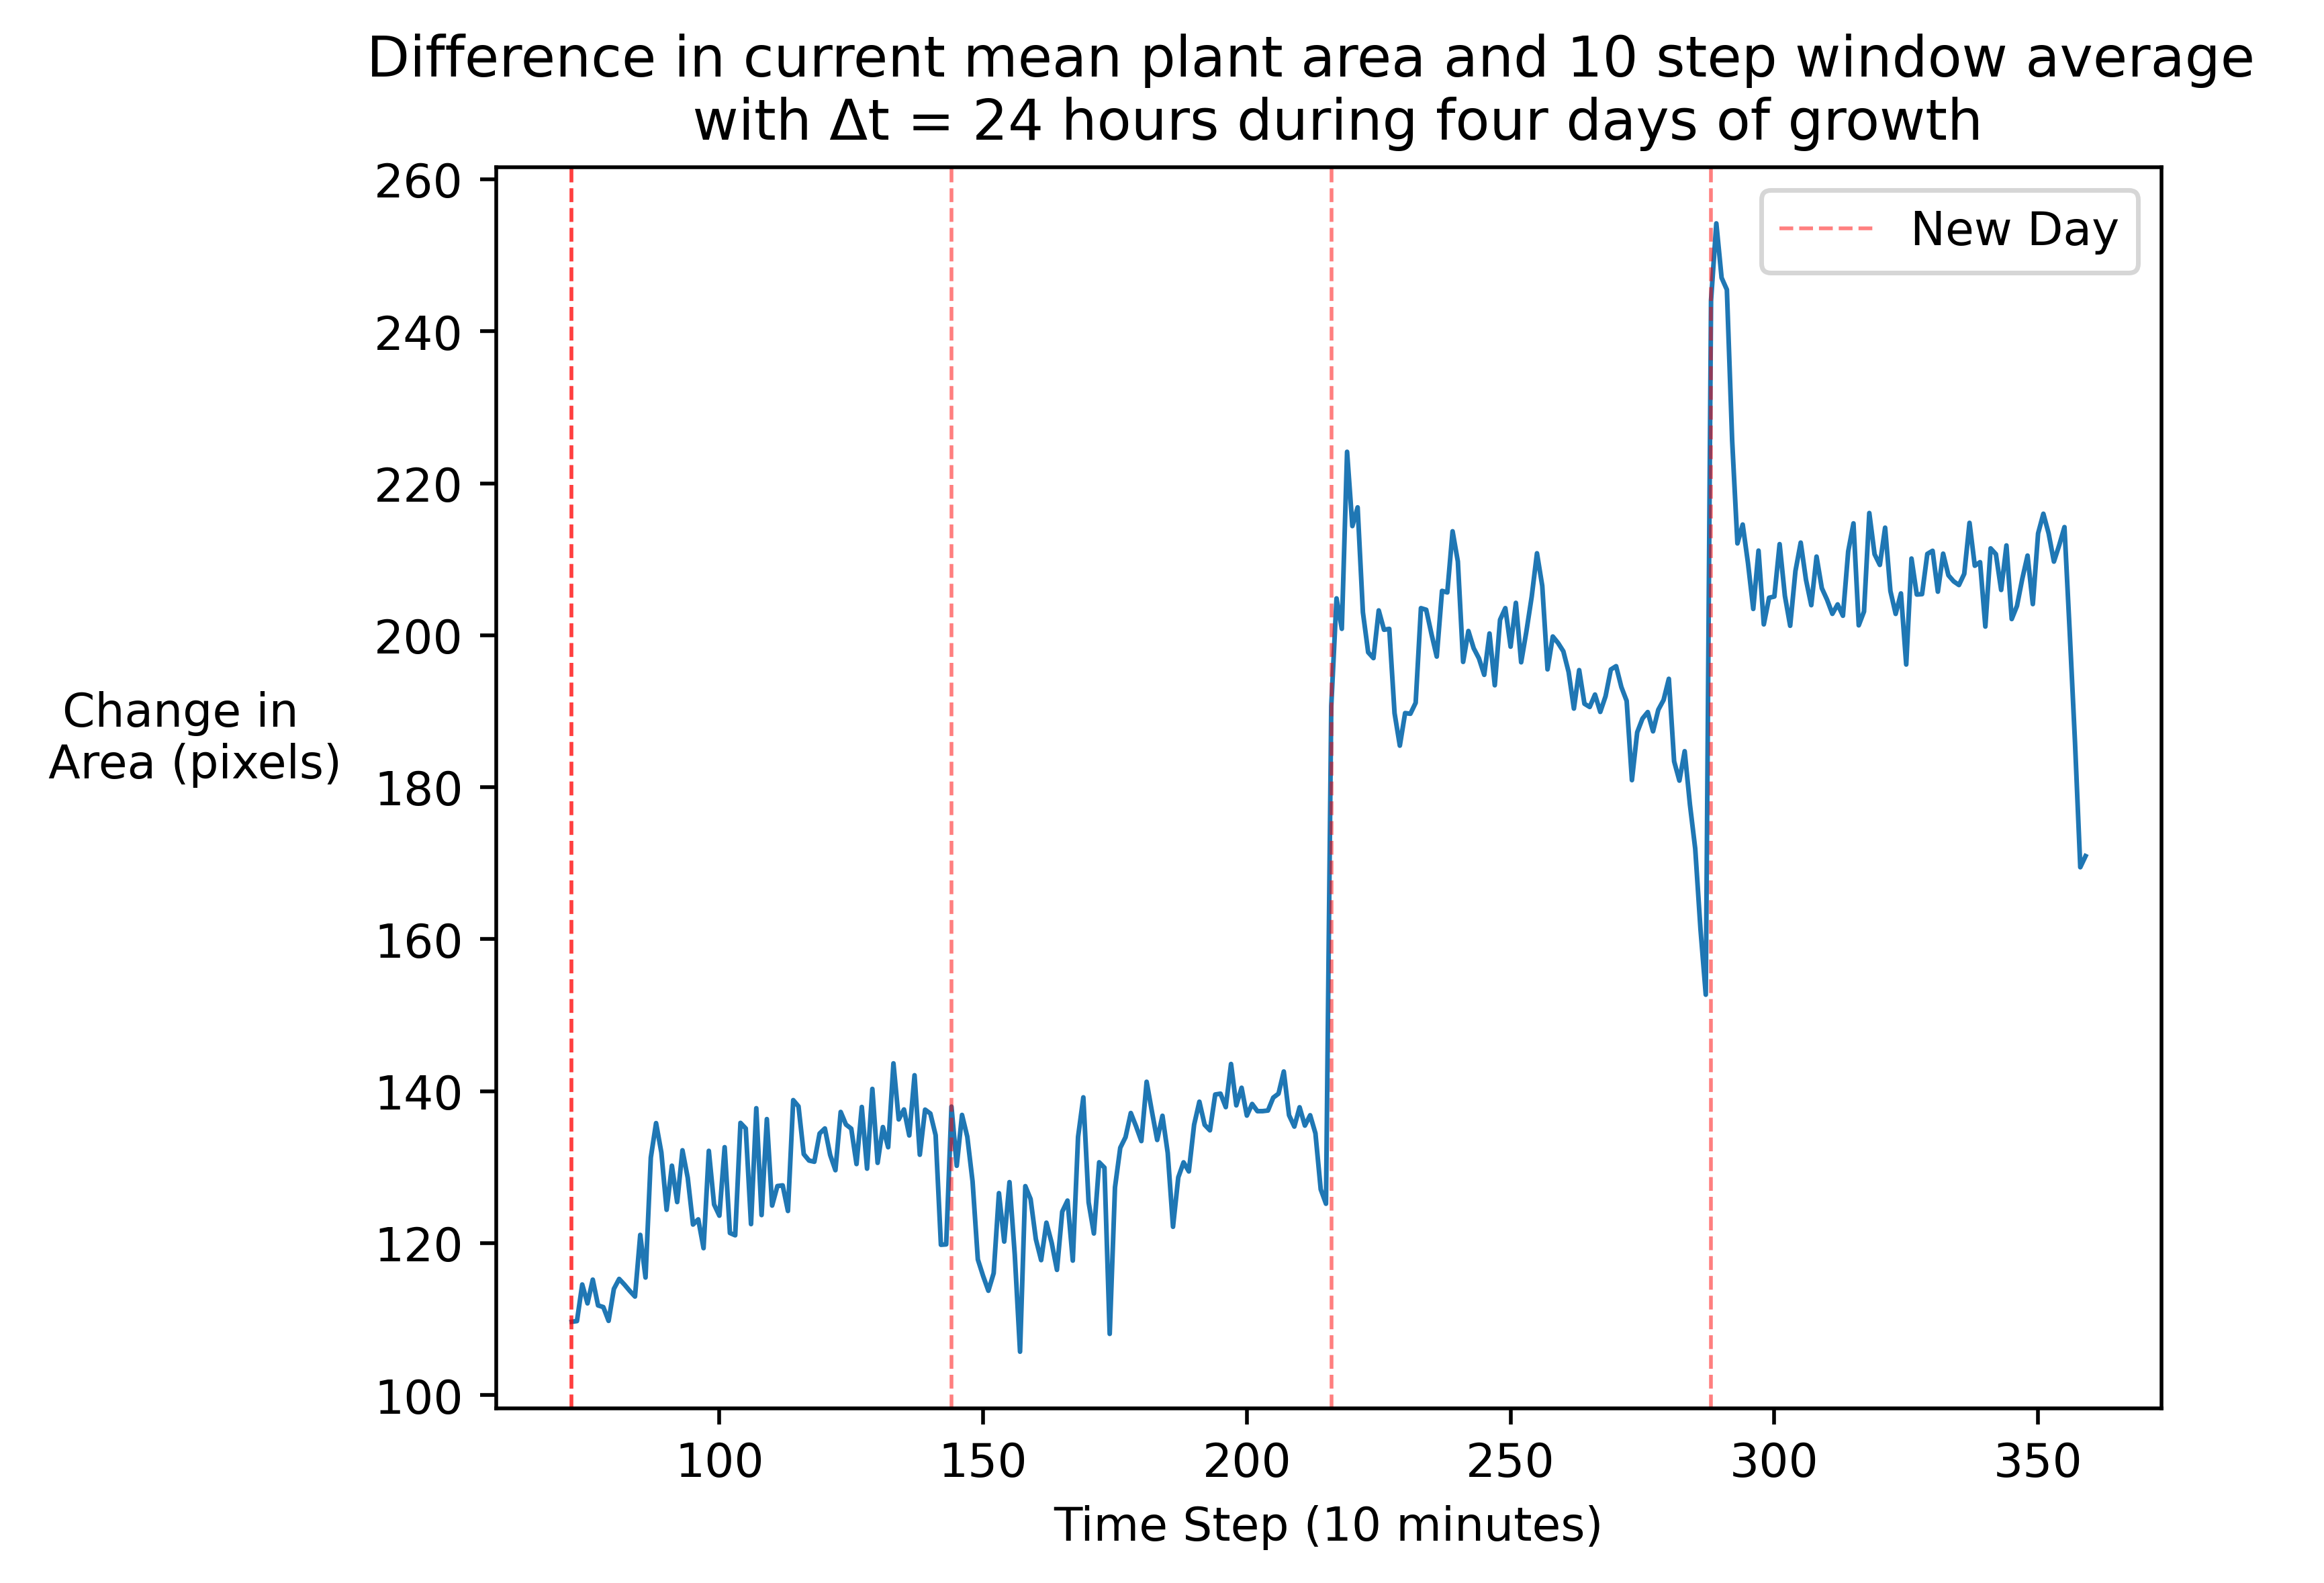

In [141]:
plt.figure(dpi=500)
#plt.ylim(-30, 30)
plt.plot(df_norm_lag['mean_window_avg_lagged_delta'][0:288], linewidth=1)
for i in range(72, 360, 72):
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
plt.axvline(x=72, color='red', linestyle='--', alpha=0.5, linewidth=0.8, label='New Day')
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n Area (pixels)', rotation=0, labelpad=40)
plt.title("Difference in current mean plant area and 10 step window average  \n with Δt = 24 hours during four days of growth")
plt.legend()
plt.show()

### EDA

Printing all rows where the change was greater than 100 (as well as the previous entry)
to see if they are at the start of new days or if something else explains this

In [128]:
mask = delta_df['mean_change'] > 100
delta_df[mask | mask.shift(-1, fill_value=False)]

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
287  2024-02-13 20:50:00             -14.0              16.0   
288  2024-02-14 09:00:00             258.0              86.0   
431  2024-02-15 20:50:00              -9.0              -5.0   
432  2024-02-16 09:00:00             177.0             273.0   
503  2024-02-16 20:50:00              59.0             -29.0   
504  2024-02-17 09:00:00             219.0             416.0   
575  2024-02-17 20:50:00              -7.0             -34.0   
576  2024-02-18 09:00:00             243.0             399.0   
647  2024-02-18 20:50:00              15.0             -19.0   
648  2024-02-19 09:00:00             376.0             542.0   
719  2024-02-19 20:50:00             -23.0             -47.0   
720  2024-02-20 09:00:00             144.0             411.0   
791  2024-02-20 20:50:00              17.0              23.0   
792  2024-02-21 09:00:00              83.0             574.0   
793  2024-02-21 09:10:00             141.0             147.0   
863  2024-02-21 20:50:00              -8.0             -67.0   
864  2024-02-22 09:00:00             385.0             781.0   
865  2024-02-22 09:10:00              -4.0             125.0   
889  2024-02-22 13:10:00              69.0              32.0   
890  2024-02-22 13:20:00             -80.0             -60.0   
935  2024-02-22 20:50:00               9.0              -5.0   
936  2024-02-23 09:00:00             373.0             883.0   
951  2024-02-23 11:30:00            -106.0             -75.0   
952  2024-02-23 11:40:00             288.0             111.0   
1007 2024-02-23 20:50:00              23.0             -38.0   
1008 2024-02-24 09:00:00            1047.0            1725.0   
1009 2024-02-24 09:10:00             -21.0             250.0   
1018 2024-02-24 10:40:00             -19.0             -39.0   
1019 2024-02-24 10:50:00             276.0             228.0   
1079 2024-02-24 20:50:00             -26.0             -15.0   
1080 2024-02-25 09:00:00             453.0             647.0   
1089 2024-02-25 10:30:00            -166.0            -172.0   
1090 2024-02-25 10:40:00             251.0             242.0   
1091 2024-02-25 10:50:00             186.0             137.0   
1092 2024-02-25 11:00:00            -522.0            -544.0   
1093 2024-02-25 11:10:00             557.0             614.0   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
287               -6.0               2.0              11.0              -6.0   
288               47.0              87.0              97.0             196.0   
431              -23.0              -6.0               8.0               8.0   
432               72.0             191.0             182.0             211.0   
503               -4.0               4.0              -2.0             -12.0   
504              112.0             242.0             229.0             207.0   
575                7.0             -17.0             -13.0              35.0   
576               71.0             298.0             212.0             201.0   
647               -7.0               0.0               0.0             -41.0   
648              197.0             200.0             378.0             419.0   
719               10.0              -4.0              31.0             -29.0   
720              234.0             363.0             285.0             450.0   
791               25.0               9.0             -12.0              47.0   
792              146.0             610.0             280.0             428.0   
793               42.0              74.0             142.0              51.0   
863              -46.0               0.0              89.0             -13.0   
864              389.0             761.0             611.0             380.0   
865              -37.0              11.0              88.0             101.0   
889               42.0              37.0               8.0               0.0   
890              -53.0             -47.0      

It seems that the big jumps usually happen overnight, though sometimes a large change in area also occurs in the first 10 mins of the day. Then there is the outlier period from 2024-02-25 10:30 to 2024-02-25 11:10 where we see large jumps every 10 mins (in particular two massive outliers with average change of -2039.069231 and 2049.338462). I wonder what is going on here?